# Predict the weekly sales of walmart stores by section using historical sales, markdown data and macro-economic indicators 


Every Departmental store chain like Walmart wants to predict the store sales in the nearby future so that inventory planning can be done. Along with that, sales prediction helps to increase/decrease store staff based on the rush (More sales can mean more customers are coming to the stores). Also, it is always a good idea to do sales and revenue forecasting to better understand the company's cash-flows and overall growth.

For inventory planning, you also need to know what products (or category of products aka department) will be utilised more. Under-stock some products and your sales are hit. Over-stock items like perishables and you run into losses if the product expires. That's why the sales prediction is done at a combination of store and department level (and sometimes even at product level for high-selling products).

In this problem, we have been given the sales data of 45 stores based on store, department and week. The size and type of each store has been provided. Holiday weeks have been marked. Along with these, price markdown data (almost like discount data) has been given. A few macro-indicators like CPI, Unemployment rate, Fuel price etc. are also provided.

In [1]:
# EDA- Sales Data

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('/users/arissa/Desktop/walmart')

In [4]:
#reading the required data files
sales_data = pd.read_csv('sales_data.csv')
stores_data = pd.read_csv('stores.csv')
features_data = pd.read_csv('features.csv')

In [5]:
sales_data

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]

In [6]:
sales_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
sales_data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [8]:
sales_data.shape

(421570, 5)

In [9]:
# check unique values
sales_data.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [10]:
sales_data.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [11]:
sales_data.loc[sales_data['Weekly_Sales']<=0]

Store  Dept        Date  Weekly_Sales  IsHoliday
846         1     6  2012-08-10       -139.65      False
2384        1    18  2012-05-04         -1.27      False
6048        1    47  2010-02-19       -863.00      False
6049        1    47  2010-03-12       -698.00      False
6051        1    47  2010-10-08        -58.00      False
...       ...   ...         ...           ...        ...
419597     45    80  2010-02-12         -0.43       True
419598     45    80  2010-02-19         -0.27      False
419603     45    80  2010-04-16         -1.61      False
419614     45    80  2010-07-02         -0.27      False
419640     45    80  2011-02-11         -0.24       True

[1358 rows x 5 columns]

In [12]:

##now we wanna see if this is a systematic issue or random
sales_data_check=sales_data.loc[sales_data['Weekly_Sales']<=0]
sales_data_check.shape

(1358, 5)

In [13]:
sales_data_check['Weekly_Sales'].describe()

count    1358.000000
mean      -64.920147
std       225.877919
min     -4988.940000
25%       -38.000000
50%       -12.000000
75%        -3.855000
max         0.000000
Name: Weekly_Sales, dtype: float64

In [14]:
sales_data_check.shape[0]/sales_data.shape[0]

0.003221291837654482

In [15]:
#Since it affects a small percentage of the data, lets drop these records
# we only want to see positive sales
sales_data2 = sales_data.loc[sales_data['Weekly_Sales']>0]
sales_data2.shape

(420212, 5)

In [16]:
sales_data2.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [17]:
sales_data2['Store']=sales_data2['Store'].astype(str)
sales_data2['Dept']=sales_data2['Dept'].astype(str)
# create a dummy variable
sales_data2['IsHoliday']=sales_data2['IsHoliday']*1

<ipython-input-17-50b3ea32d921>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data2['Store']=sales_data2['Store'].astype(str)
<ipython-input-17-50b3ea32d921>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data2['Dept']=sales_data2['Dept'].astype(str)
<ipython-input-17-50b3ea32d921>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [18]:
sales_data2

Store Dept        Date  Weekly_Sales  IsHoliday
0          1    1  2010-02-05      24924.50          0
1          1    1  2010-02-12      46039.49          1
2          1    1  2010-02-19      41595.55          0
3          1    1  2010-02-26      19403.54          0
4          1    1  2010-03-05      21827.90          0
...      ...  ...         ...           ...        ...
421565    45   98  2012-09-28        508.37          0
421566    45   98  2012-10-05        628.10          0
421567    45   98  2012-10-12       1061.02          0
421568    45   98  2012-10-19        760.01          0
421569    45   98  2012-10-26       1076.80          0

[420212 rows x 5 columns]

In [19]:
# create a function that does all of the above tasks

In [20]:
def get_basic_stats(dfname):
    print("Shape of dataframe is"+ str(dfname.shape))
    print("Below are datatypes of columns in DF")
    print(dfname.dtypes.sort_values())
    print("Below are missing values in each column")
    print(dfname.isna().sum().sort_values())
    print("Below are the number of unique values taken by a column")
    print(dfname.nunique())
    print("Below are some records in DF")
    print(dfname.head())
    print("Basic Stats for numeric variables")
    print(dfname.describe())

In [21]:
get_basic_stats(features_data)

Shape of dataframe is(8190, 12)
Below are datatypes of columns in DF
IsHoliday          bool
Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Date             object
dtype: object
Below are missing values in each column
Store              0
Date               0
Temperature        0
Fuel_Price         0
IsHoliday          0
CPI              585
Unemployment     585
MarkDown5       4140
MarkDown1       4158
MarkDown3       4577
MarkDown4       4726
MarkDown2       5269
dtype: int64
Below are the number of unique values taken by a column
Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64
Bel

In [22]:
get_basic_stats(stores_data)

Shape of dataframe is(45, 3)
Below are datatypes of columns in DF
Store     int64
Size      int64
Type     object
dtype: object
Below are missing values in each column
Store    0
Type     0
Size     0
dtype: int64
Below are the number of unique values taken by a column
Store    45
Type      3
Size     40
dtype: int64
Below are some records in DF
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
Basic Stats for numeric variables
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


In [23]:
#coverting variable to correct datatype
features_data['Store'] = features_data['Store'].astype(str)
stores_data['Store'] = stores_data['Store'].astype(str)

# Missing Value Imputation


In [24]:
features_data2 = features_data.drop(['IsHoliday'], axis=1)

In [25]:
features_data2['Unemployment'].fillna(features_data2['Unemployment'].mean(),inplace=True)

In [26]:
features_data2['CPI'].fillna(features_data2['CPI'].mean(),inplace=True)

In [27]:
features_data2.fillna(0, inplace=True)

In [28]:
features_data2.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [29]:
# make groups by types, then calculate mean size 

stores_data.groupby('Type').agg({'Size':'mean'})

Size
Type               
A     177247.727273
B     101190.705882
C      40541.666667

# Data preparation


In [30]:
#Stores unique key = Store
#Features Data - Store+Date
#Store+Dept+Date

In [31]:
stores_data

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
5      6    A  202505
6      7    B   70713
7      8    A  155078
8      9    B  125833
9     10    B  126512
10    11    A  207499
11    12    B  112238
12    13    A  219622
13    14    A  200898
14    15    B  123737
15    16    B   57197
16    17    B   93188
17    18    B  120653
18    19    A  203819
19    20    A  203742
20    21    B  140167
21    22    B  119557
22    23    B  114533
23    24    A  203819
24    25    B  128107
25    26    A  152513
26    27    A  204184
27    28    A  206302
28    29    B   93638
29    30    C   42988
30    31    A  203750
31    32    A  203007
32    33    A   39690
33    34    A  158114
34    35    B  103681
35    36    A   39910
36    37    C   39910
37    38    C   39690
38    39    A  184109
39    40    A  155083
40    41    A  196321
41    42    C   39690
42    43    C   41062
43    44    C   39910
44    45    B  118221

In [32]:
features_data2

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0        1  2010-02-05        42.31       2.572       0.00       0.00   
1        1  2010-02-12        38.51       2.548       0.00       0.00   
2        1  2010-02-19        39.93       2.514       0.00       0.00   
3        1  2010-02-26        46.63       2.561       0.00       0.00   
4        1  2010-03-05        46.50       2.625       0.00       0.00   
...    ...         ...          ...         ...        ...        ...   
8185    45  2013-06-28        76.05       3.639    4842.29     975.03   
8186    45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187    45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188    45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189    45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0          0.00       0.00       0.00  211.096358      8.106000  
1          0.00       0.00       0.00  211.242170      8.106000  
2          0.00       0.00       0.00  211.289143      8.106000  
3          0.00       0.00       0.00  211.319643      8.106000  
4          0.00       0.00       0.00  211.350143      8.106000  
...         ...        ...        ...         ...           ...  
8185       3.00    2449.97    3169.69  172.460809      7.826821  
8186     582.74    5797.47    1514.93  172.460809      7.826821  
8187      85.72     744.84    2150.36  172.460809      7.826821  
8188     204.19     363.00    1059.46  172.460809      7.826821  
8189       2.06      10.88    1864.57  172.460809      7.826821  

[8190 rows x 11 columns]

In [33]:
#Merging datasets

In [34]:
features_data2.groupby(['Store','Date']).size().shape[0]-features_data2.shape[0]

0

In [35]:
sales_data.groupby(['Store','Dept','Date']).size().shape[0]- sales_data.shape[0]

0

In [36]:
sales_features_data=pd.merge(sales_data2, features_data2, on=['Store', 'Date'], how='inner')
sales_features_data

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0          1    1  2010-02-05      24924.50          0        42.31   
1          1    2  2010-02-05      50605.27          0        42.31   
2          1    3  2010-02-05      13740.12          0        42.31   
3          1    4  2010-02-05      39954.04          0        42.31   
4          1    5  2010-02-05      32229.38          0        42.31   
...      ...  ...         ...           ...        ...          ...   
420207    45   93  2012-10-26       2487.80          0        58.85   
420208    45   94  2012-10-26       5203.31          0        58.85   
420209    45   95  2012-10-26      56017.47          0        58.85   
420210    45   97  2012-10-26       6817.48          0        58.85   
420211    45   98  2012-10-26       1076.80          0        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572       0.00       0.00        0.0       0.00       0.00   
1            2.572       0.00       0.00        0.0       0.00       0.00   
2            2.572       0.00       0.00        0.0       0.00       0.00   
3            2.572       0.00       0.00        0.0       0.00       0.00   
4            2.572       0.00       0.00        0.0       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
420207       3.882    4018.91      58.08      100.0     211.94     858.33   
420208       3.882    4018.91      58.08      100.0     211.94     858.33   
420209       3.882    4018.91      58.08      100.0     211.94     858.33   
420210       3.882    4018.91      58.08      100.0     211.94     858.33   
420211       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment  
0       211.096358         8.106  
1       211.096358         8.106  
2       211.096358         8.106  
3       211.096358         8.106  
4       211.096358         8.106  
...            ...           ...  
420207  192.308899         8.667  
420208  192.308899         8.667  
420209  192.308899         8.667  
420210  192.308899         8.667  
420211  192.308899         8.667  

[420212 rows x 14 columns]

In [37]:
sales_features_data.shape

(420212, 14)

In [38]:
combined_data = pd.merge(sales_features_data, stores_data, on='Store', how='inner')
combined_data.shape

(420212, 16)

In [39]:
combined_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

# Dividing data into train and test 

In [40]:
#getting the date variable in the correct format
combined_data['Date2']=pd.to_datetime(combined_data['Date'],format = '%Y-%m-%d')

In [41]:
print(combined_data['Date2'].nunique())

143


In [42]:
combined_data['Date2'].describe()

<ipython-input-42-09112b2cd446>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  combined_data['Date2'].describe()


count                  420212
unique                    143
top       2011-12-23 00:00:00
freq                     3018
first     2010-02-05 00:00:00
last      2012-10-26 00:00:00
Name: Date2, dtype: object

In [43]:
(combined_data['Date2'].max()-combined_data['Date2'].min())/7

Timedelta('142 days 00:00:00')

In [44]:
# so the dates are continuous, and no missing because there are 143 unique dates, and the gap is 142 days

In [45]:
unique_dates = pd.DataFrame(combined_data['Date2'].unique(), columns = ['date'])
unique_dates.sort_values('date',inplace=True)
unique_dates

date
0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
..         ...
138 2012-09-28
139 2012-10-05
140 2012-10-12
141 2012-10-19
142 2012-10-26

[143 rows x 1 columns]

In [46]:
splitter=round(unique_dates.shape[0]*0.7,0)
split_date=unique_dates.iloc[int(splitter)-1]['date']
split_date

Timestamp('2011-12-30 00:00:00')

In [47]:
#Using that date to make the split
combined_data_train=combined_data.loc[combined_data['Date2']<=split_date]

In [48]:
combined_data_test=combined_data.loc[combined_data['Date2']>split_date]

In [49]:
combined_data_train.shape[0]/combined_data.shape[0]

0.6977525629920136

# Univariate Analysis

(array([7157., 7140., 6309., 7175., 6286., 7121., 6796., 6909., 6158.,
        7206., 6988., 6736., 7324., 6995., 6886., 6482., 6823., 6818.,
        7077., 7119., 6651., 6733., 7017., 7137., 6824., 6867., 7127.,
        7058., 6604., 4990., 7071., 7122., 4470., 7177., 6586., 4321.,
        4947., 5066., 6885., 6979., 6987., 4729., 4707., 4932., 6712.]),
 array([ 0.        ,  0.97777778,  1.95555556,  2.93333333,  3.91111111,
         4.88888889,  5.86666667,  6.84444444,  7.82222222,  8.8       ,
         9.77777778, 10.75555556, 11.73333333, 12.71111111, 13.68888889,
        14.66666667, 15.64444444, 16.62222222, 17.6       , 18.57777778,
        19.55555556, 20.53333333, 21.51111111, 22.48888889, 23.46666667,
        24.44444444, 25.42222222, 26.4       , 27.37777778, 28.35555556,
        29.33333333, 30.31111111, 31.28888889, 32.26666667, 33.24444444,
        34.22222222, 35.2       , 36.17777778, 37.15555556, 38.13333333,
        39.11111111, 40.08888889, 41.06666667, 42.04444444,

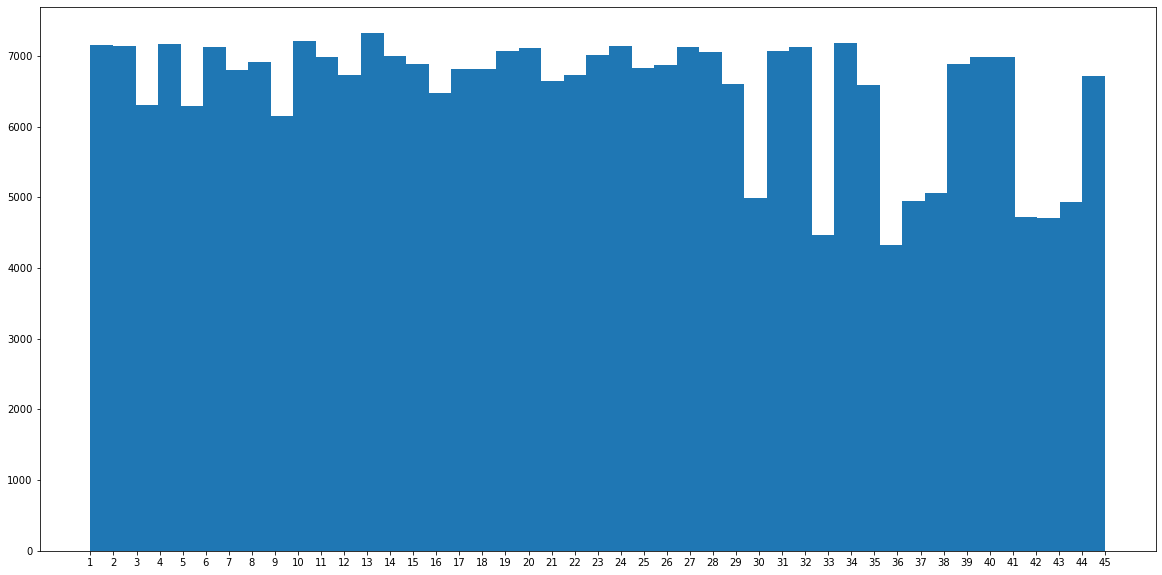

In [50]:
plt.figure(figsize=(20,10))
plt.hist(list(combined_data_train['Store']), bins = combined_data_train['Store'].nunique() )

In [51]:

# extract categorical variable
cat_columns=combined_data_train.select_dtypes(np.object).columns.tolist()

In [52]:
cat_columns

['Store', 'Dept', 'Date', 'Type']

In [53]:
#univariate analysis of categorical variables

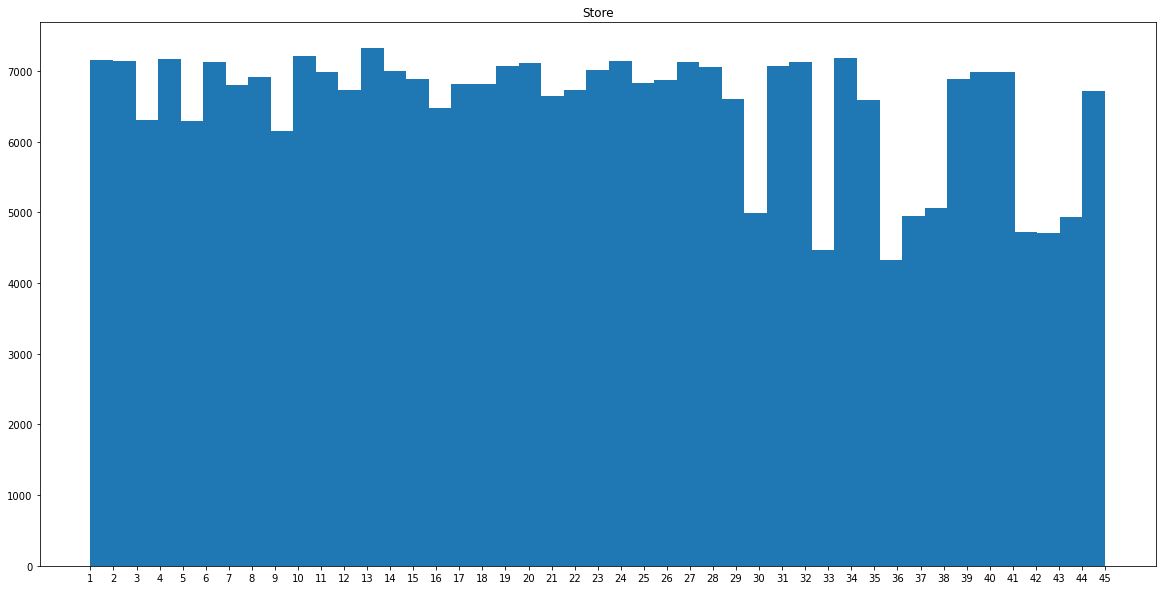

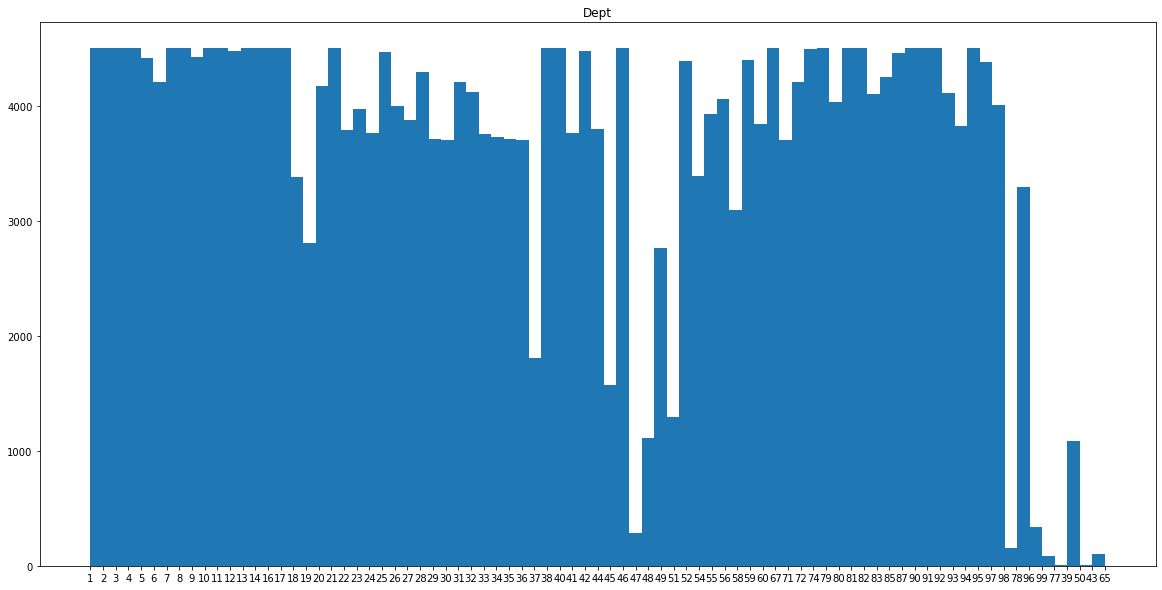

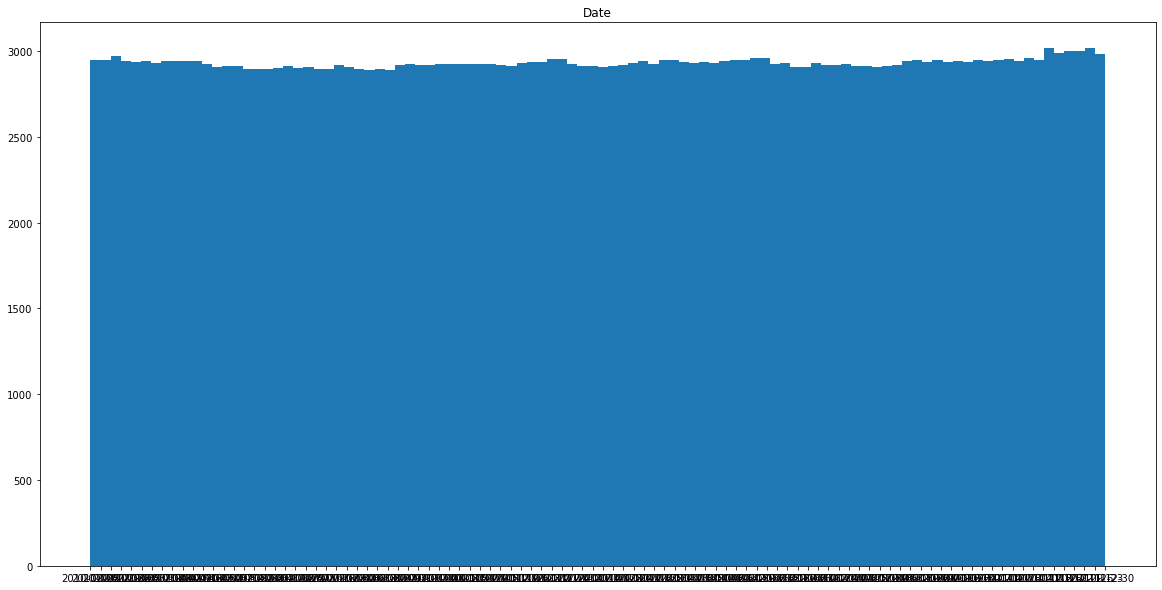

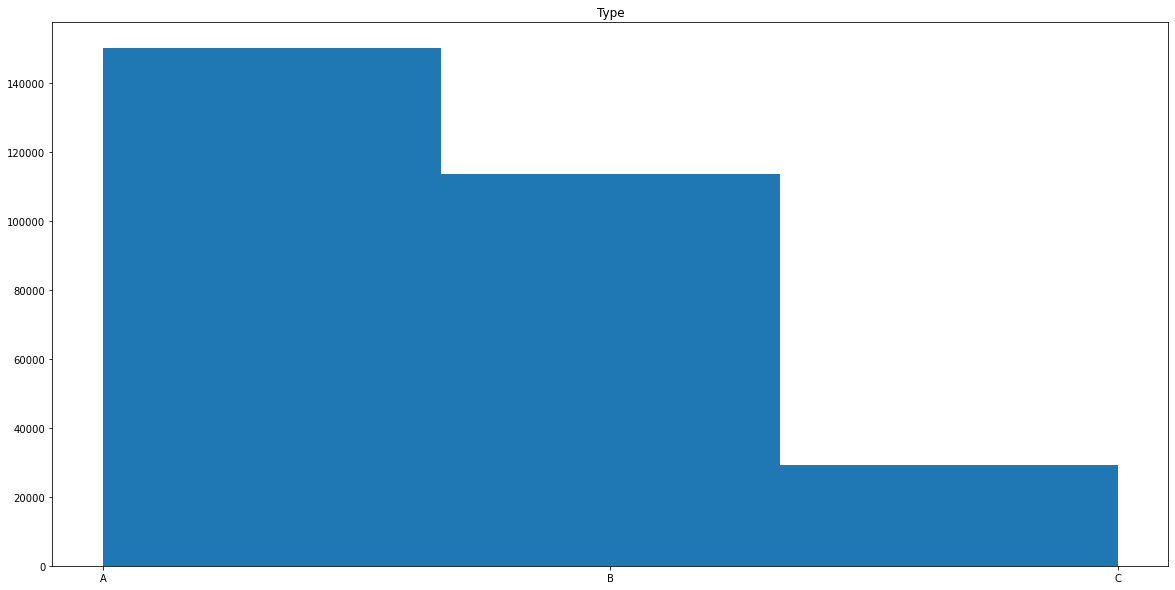

In [54]:
for var in cat_columns:
    plt.figure(figsize=(20,10))
    plt.hist(list(combined_data_train[var]),bins = combined_data_train[var].nunique())
    plt.title(var)
    plt.show

In [55]:
# extract numerica variables
num_columns = combined_data_train.select_dtypes(np.number).columns.tolist()
num_columns

['Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Size']

In [56]:
mark_columns=[x for x in num_columns if 'Mark' in x]
mark_columns

['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

In [57]:
# see the difference between two list: num_columns  and list: mark_columns

nonmark_columns = list(set(num_columns).difference(set(mark_columns)))
nonmark_columns

['Temperature',
 'IsHoliday',
 'Size',
 'Weekly_Sales',
 'Fuel_Price',
 'Unemployment',
 'CPI']

<AxesSubplot:>

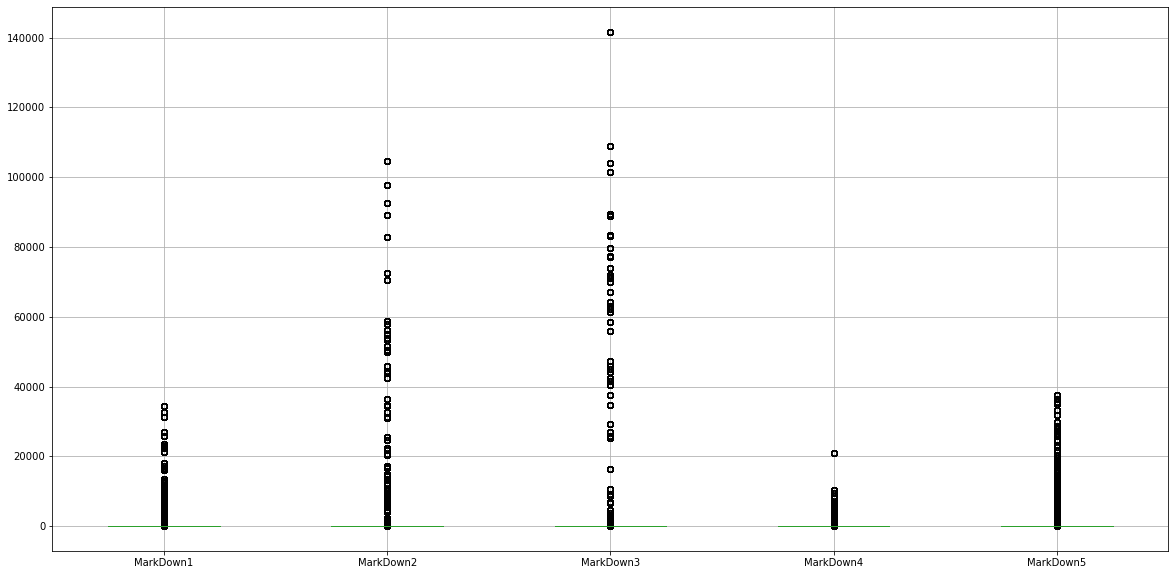

In [58]:
combined_data_train.boxplot(column = mark_columns, figsize=(20,10))

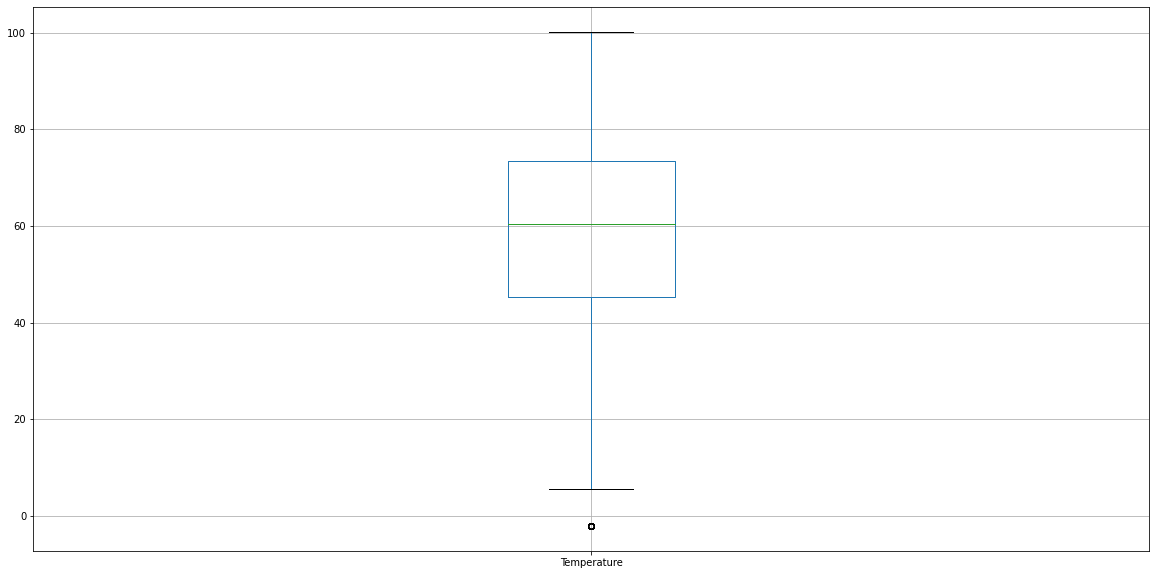

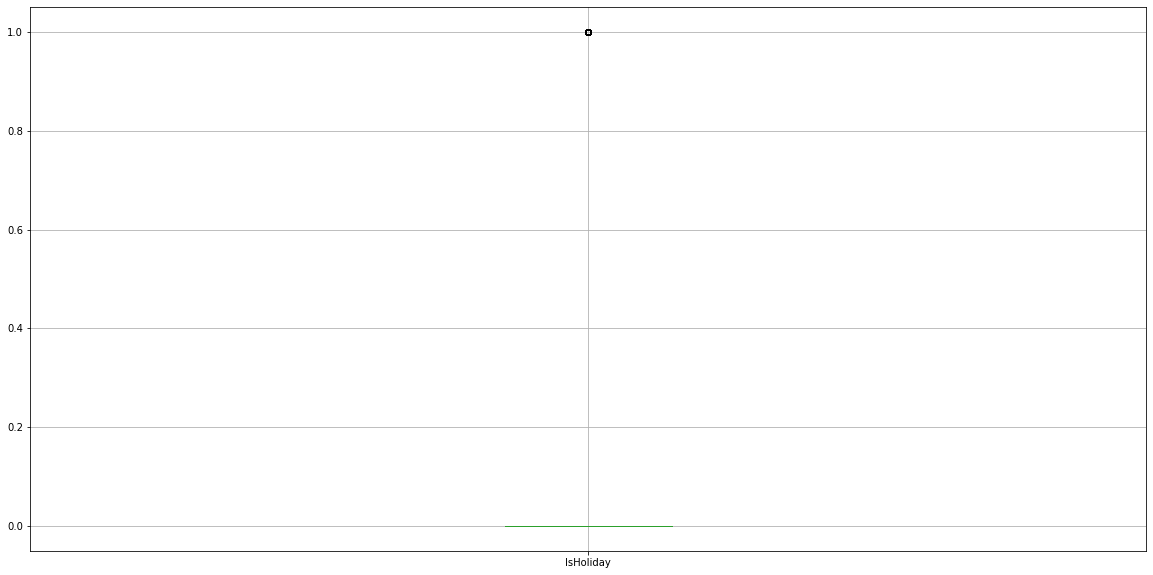

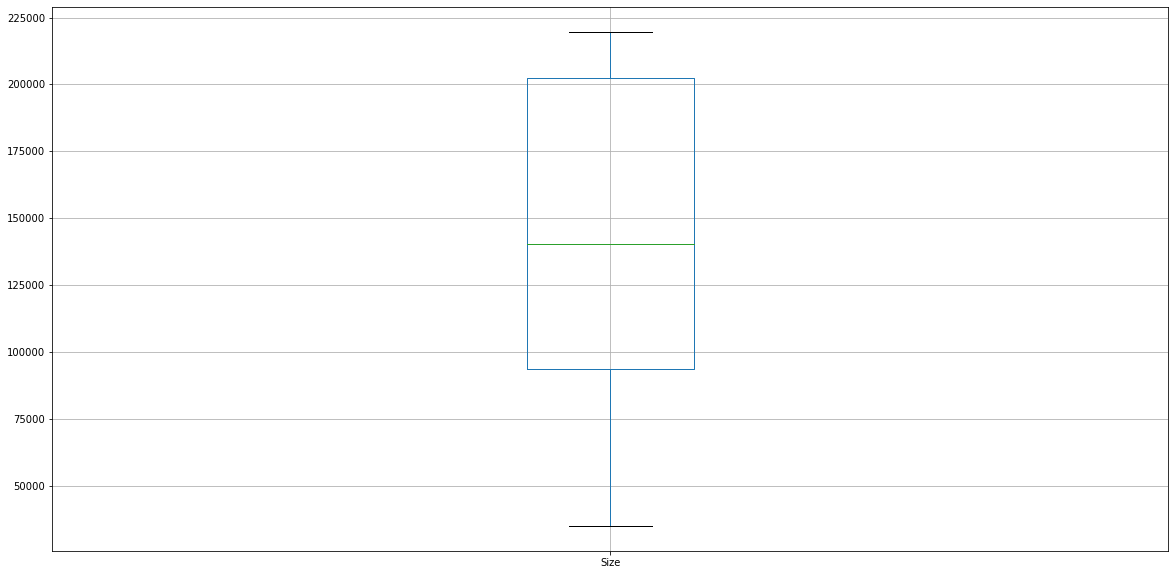

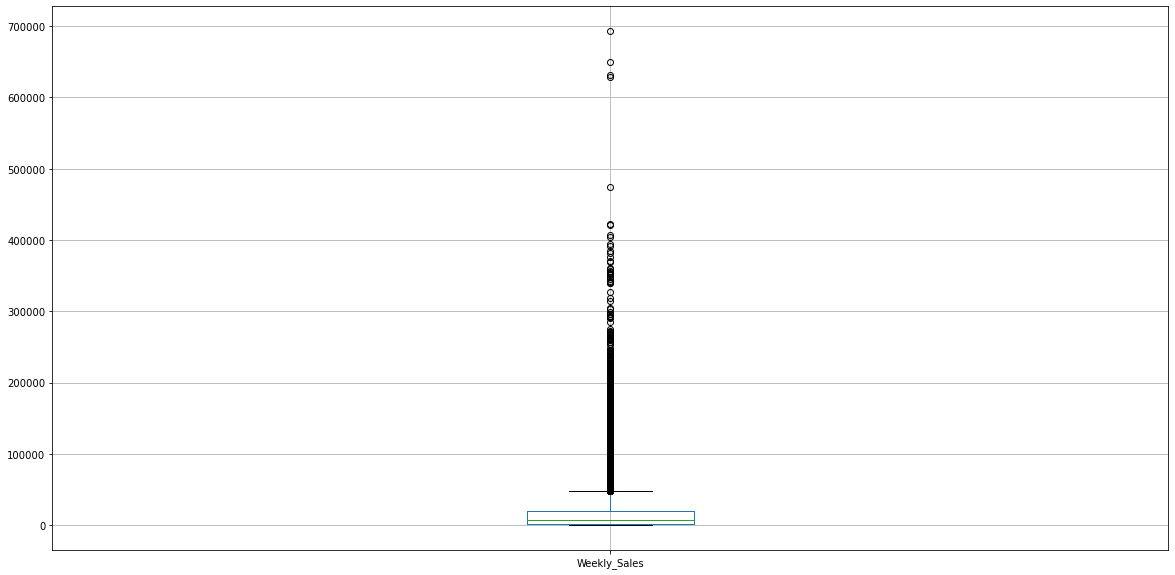

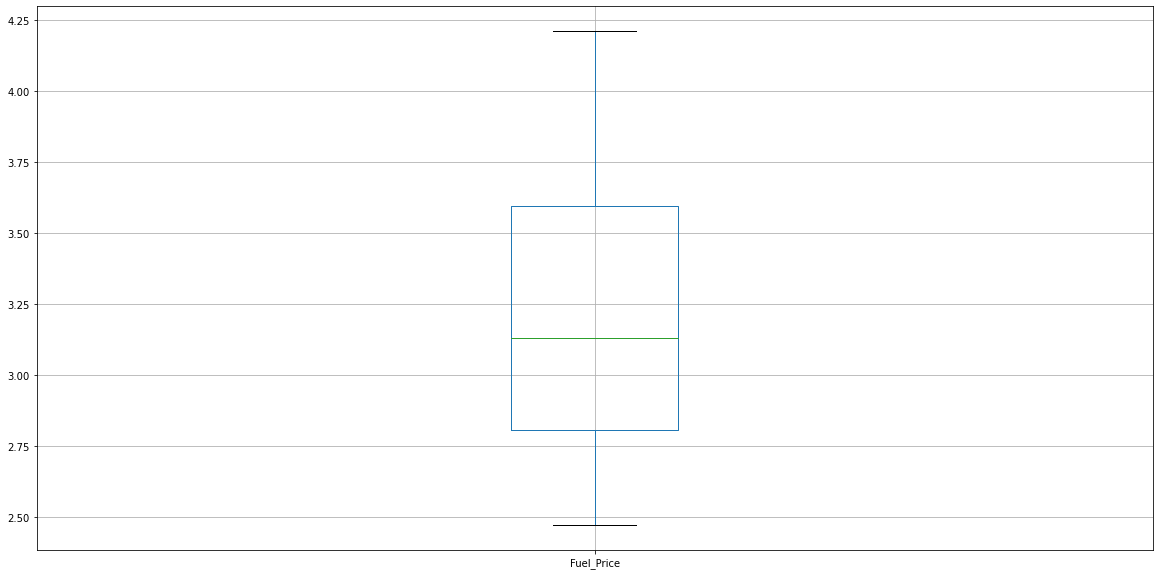

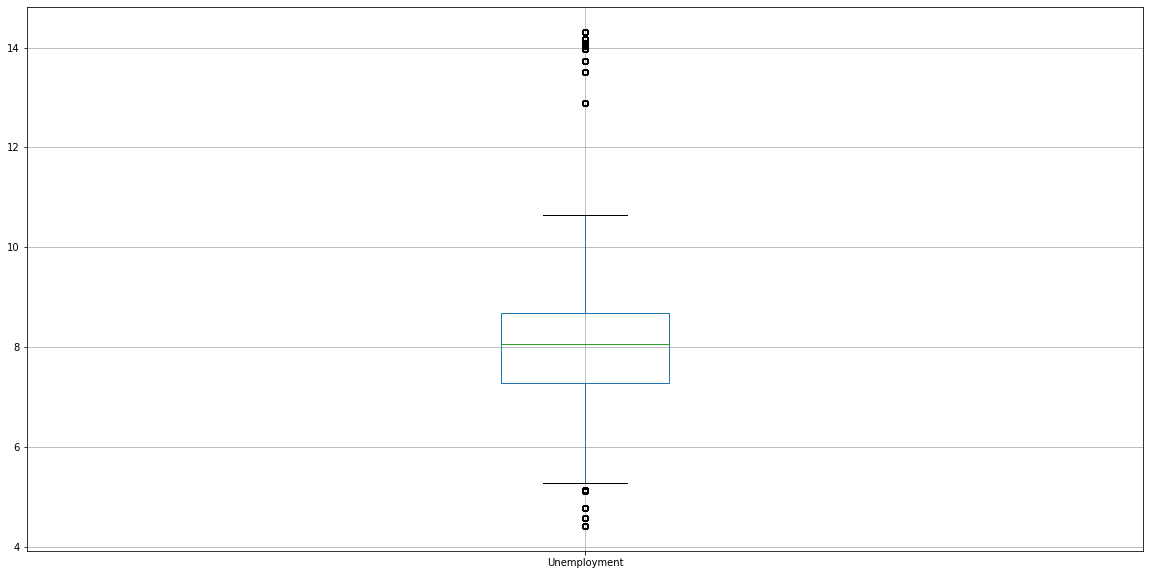

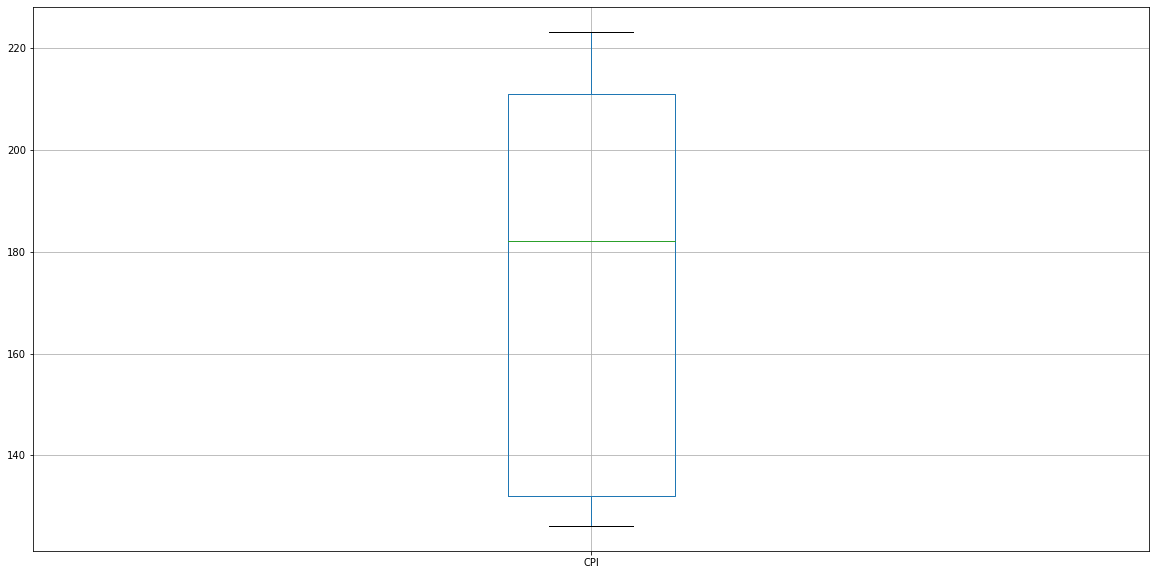

In [59]:
for var in nonmark_columns:
    combined_data_train.boxplot(column = var, figsize=(20,10))
    plt.show()

# Bivariate Analysis

In [60]:
num_columns

['Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Size']

In [61]:
train_num = combined_data_train[num_columns]
train_num

Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0           24924.50          0        42.31       2.572       0.00   
1           50605.27          0        42.31       2.572       0.00   
2           13740.12          0        42.31       2.572       0.00   
3           39954.04          0        42.31       2.572       0.00   
4           32229.38          0        42.31       2.572       0.00   
...              ...        ...          ...         ...        ...   
417309       1426.52          1        37.79       3.389    3604.35   
417310       2979.03          1        37.79       3.389    3604.35   
417311      42084.36          1        37.79       3.389    3604.35   
417312       5569.82          1        37.79       3.389    3604.35   
417313        553.21          1        37.79       3.389    3604.35   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0            0.00       0.00       0.00       0.00  211.096358         8.106   
1            0.00       0.00       0.00       0.00  211.096358         8.106   
2            0.00       0.00       0.00       0.00  211.096358         8.106   
3            0.00       0.00       0.00       0.00  211.096358         8.106   
4            0.00       0.00       0.00       0.00  211.096358         8.106   
...           ...        ...        ...        ...         ...           ...   
417309   43941.56     287.45     357.43     750.01  189.062016         8.523   
417310   43941.56     287.45     357.43     750.01  189.062016         8.523   
417311   43941.56     287.45     357.43     750.01  189.062016         8.523   
417312   43941.56     287.45     357.43     750.01  189.062016         8.523   
417313   43941.56     287.45     357.43     750.01  189.062016         8.523   

          Size  
0       151315  
1       151315  
2       151315  
3       151315  
4       151315  
...        ...  
417309  118221  
417310  118221  
417311  118221  
417312  118221  
417313  118221  

[293204 rows x 12 columns]

In [62]:
train_num=train_num.drop(['Weekly_Sales'],axis=1)
train_num

IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0               0        42.31       2.572       0.00       0.00       0.00   
1               0        42.31       2.572       0.00       0.00       0.00   
2               0        42.31       2.572       0.00       0.00       0.00   
3               0        42.31       2.572       0.00       0.00       0.00   
4               0        42.31       2.572       0.00       0.00       0.00   
...           ...          ...         ...        ...        ...        ...   
417309          1        37.79       3.389    3604.35   43941.56     287.45   
417310          1        37.79       3.389    3604.35   43941.56     287.45   
417311          1        37.79       3.389    3604.35   43941.56     287.45   
417312          1        37.79       3.389    3604.35   43941.56     287.45   
417313          1        37.79       3.389    3604.35   43941.56     287.45   

        MarkDown4  MarkDown5         CPI  Unemployment    Size  
0            0.00       0.00  211.096358         8.106  151315  
1            0.00       0.00  211.096358         8.106  151315  
2            0.00       0.00  211.096358         8.106  151315  
3            0.00       0.00  211.096358         8.106  151315  
4            0.00       0.00  211.096358         8.106  151315  
...           ...        ...         ...           ...     ...  
417309     357.43     750.01  189.062016         8.523  118221  
417310     357.43     750.01  189.062016         8.523  118221  
417311     357.43     750.01  189.062016         8.523  118221  
417312     357.43     750.01  189.062016         8.523  118221  
417313     357.43     750.01  189.062016         8.523  118221  

[293204 rows x 11 columns]

In [63]:
#Checking the highly correlated variables

In [64]:
corr_values=train_num.corr().unstack().reset_index()
corr_values


level_0       level_1         0
0    IsHoliday     IsHoliday  1.000000
1    IsHoliday   Temperature -0.178936
2    IsHoliday    Fuel_Price -0.060499
3    IsHoliday     MarkDown1  0.034691
4    IsHoliday     MarkDown2  0.272442
..         ...           ...       ...
116       Size     MarkDown4  0.077153
117       Size     MarkDown5  0.067597
118       Size           CPI -0.005275
119       Size  Unemployment -0.085202
120       Size          Size  1.000000

[121 rows x 3 columns]

In [65]:
print(corr_values.shape)


(121, 3)


In [66]:
corr_values2 = corr_values[corr_values['level_0'] > corr_values['level_1'] ]
corr_values2

level_0      level_1         0
2       IsHoliday   Fuel_Price -0.060499
8       IsHoliday          CPI  0.003058
11    Temperature    IsHoliday -0.178936
13    Temperature   Fuel_Price  0.112741
14    Temperature    MarkDown1 -0.142848
15    Temperature    MarkDown2 -0.104273
16    Temperature    MarkDown3 -0.059504
17    Temperature    MarkDown4 -0.122611
18    Temperature    MarkDown5 -0.146041
19    Temperature          CPI  0.176811
21    Temperature         Size -0.054427
30     Fuel_Price          CPI -0.180454
33      MarkDown1    IsHoliday  0.034691
35      MarkDown1   Fuel_Price  0.100885
41      MarkDown1          CPI -0.002877
44      MarkDown2    IsHoliday  0.272442
46      MarkDown2   Fuel_Price  0.029847
47      MarkDown2    MarkDown1  0.364552
52      MarkDown2          CPI  0.001564
55      MarkDown3    IsHoliday  0.296824
57      MarkDown3   Fuel_Price  0.054714
58      MarkDown3    MarkDown1  0.043023
59      MarkDown3    MarkDown2 -0.002048
63      MarkDown3          CPI -0.003137
66      MarkDown4    IsHoliday -0.005916
68      MarkDown4   Fuel_Price  0.092216
69      MarkDown4    MarkDown1  0.764146
70      MarkDown4    MarkDown2  0.232324
71      MarkDown4    MarkDown3  0.033797
74      MarkDown4          CPI -0.014325
77      MarkDown5    IsHoliday  0.006201
79      MarkDown5   Fuel_Price  0.086972
80      MarkDown5    MarkDown1  0.573937
81      MarkDown5    MarkDown2  0.122228
82      MarkDown5    MarkDown3  0.116744
83      MarkDown5    MarkDown4  0.673759
85      MarkDown5          CPI  0.002884
99   Unemployment    IsHoliday -0.004842
100  Unemployment  Temperature  0.149583
101  Unemployment   Fuel_Price  0.035137
102  Unemployment    MarkDown1 -0.037704
103  Unemployment    MarkDown2 -0.030700
104  Unemployment    MarkDown3 -0.034994
105  Unemployment    MarkDown4 -0.011361
106  Unemployment    MarkDown5 -0.039787
107  Unemployment          CPI -0.298205
109  Unemployment         Size -0.085202
110          Size    IsHoliday  0.000579
112          Size   Fuel_Price  0.008287
113          Size    MarkDown1  0.082859
114          Size    MarkDown2  0.050976
115          Size    MarkDown3  0.038361
116          Size    MarkDown4  0.077153
117          Size    MarkDown5  0.067597
118          Size          CPI -0.005275

In [67]:
corr_values['level_0'] > corr_values['level_1']

0      False
1      False
2       True
3      False
4      False
       ...  
116     True
117     True
118     True
119    False
120    False
Length: 121, dtype: bool

In [68]:
corr_values2.columns = ['var1', 'var2', 'corr_value']

In [69]:
corr_values2

var1         var2  corr_value
2       IsHoliday   Fuel_Price   -0.060499
8       IsHoliday          CPI    0.003058
11    Temperature    IsHoliday   -0.178936
13    Temperature   Fuel_Price    0.112741
14    Temperature    MarkDown1   -0.142848
15    Temperature    MarkDown2   -0.104273
16    Temperature    MarkDown3   -0.059504
17    Temperature    MarkDown4   -0.122611
18    Temperature    MarkDown5   -0.146041
19    Temperature          CPI    0.176811
21    Temperature         Size   -0.054427
30     Fuel_Price          CPI   -0.180454
33      MarkDown1    IsHoliday    0.034691
35      MarkDown1   Fuel_Price    0.100885
41      MarkDown1          CPI   -0.002877
44      MarkDown2    IsHoliday    0.272442
46      MarkDown2   Fuel_Price    0.029847
47      MarkDown2    MarkDown1    0.364552
52      MarkDown2          CPI    0.001564
55      MarkDown3    IsHoliday    0.296824
57      MarkDown3   Fuel_Price    0.054714
58      MarkDown3    MarkDown1    0.043023
59      MarkDown3    MarkDown2   -0.002048
63      MarkDown3          CPI   -0.003137
66      MarkDown4    IsHoliday   -0.005916
68      MarkDown4   Fuel_Price    0.092216
69      MarkDown4    MarkDown1    0.764146
70      MarkDown4    MarkDown2    0.232324
71      MarkDown4    MarkDown3    0.033797
74      MarkDown4          CPI   -0.014325
77      MarkDown5    IsHoliday    0.006201
79      MarkDown5   Fuel_Price    0.086972
80      MarkDown5    MarkDown1    0.573937
81      MarkDown5    MarkDown2    0.122228
82      MarkDown5    MarkDown3    0.116744
83      MarkDown5    MarkDown4    0.673759
85      MarkDown5          CPI    0.002884
99   Unemployment    IsHoliday   -0.004842
100  Unemployment  Temperature    0.149583
101  Unemployment   Fuel_Price    0.035137
102  Unemployment    MarkDown1   -0.037704
103  Unemployment    MarkDown2   -0.030700
104  Unemployment    MarkDown3   -0.034994
105  Unemployment    MarkDown4   -0.011361
106  Unemployment    MarkDown5   -0.039787
107  Unemployment          CPI   -0.298205
109  Unemployment         Size   -0.085202
110          Size    IsHoliday    0.000579
112          Size   Fuel_Price    0.008287
113          Size    MarkDown1    0.082859
114          Size    MarkDown2    0.050976
115          Size    MarkDown3    0.038361
116          Size    MarkDown4    0.077153
117          Size    MarkDown5    0.067597
118          Size          CPI   -0.005275

In [70]:
corr_values2['corr_abs']=corr_values2['corr_value'].abs()

<ipython-input-70-009d8a6d6ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_values2['corr_abs']=corr_values2['corr_value'].abs()


In [71]:
corr_values2.sort_values('corr_abs',ascending=False,inplace=True)
corr_values2

<ipython-input-71-3b63721fbcd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_values2.sort_values('corr_abs',ascending=False,inplace=True)


var1         var2  corr_value  corr_abs
69      MarkDown4    MarkDown1    0.764146  0.764146
83      MarkDown5    MarkDown4    0.673759  0.673759
80      MarkDown5    MarkDown1    0.573937  0.573937
47      MarkDown2    MarkDown1    0.364552  0.364552
107  Unemployment          CPI   -0.298205  0.298205
55      MarkDown3    IsHoliday    0.296824  0.296824
44      MarkDown2    IsHoliday    0.272442  0.272442
70      MarkDown4    MarkDown2    0.232324  0.232324
30     Fuel_Price          CPI   -0.180454  0.180454
11    Temperature    IsHoliday   -0.178936  0.178936
19    Temperature          CPI    0.176811  0.176811
100  Unemployment  Temperature    0.149583  0.149583
18    Temperature    MarkDown5   -0.146041  0.146041
14    Temperature    MarkDown1   -0.142848  0.142848
17    Temperature    MarkDown4   -0.122611  0.122611
81      MarkDown5    MarkDown2    0.122228  0.122228
82      MarkDown5    MarkDown3    0.116744  0.116744
13    Temperature   Fuel_Price    0.112741  0.112741
15    Temperature    MarkDown2   -0.104273  0.104273
35      MarkDown1   Fuel_Price    0.100885  0.100885
68      MarkDown4   Fuel_Price    0.092216  0.092216
79      MarkDown5   Fuel_Price    0.086972  0.086972
109  Unemployment         Size   -0.085202  0.085202
113          Size    MarkDown1    0.082859  0.082859
116          Size    MarkDown4    0.077153  0.077153
117          Size    MarkDown5    0.067597  0.067597
2       IsHoliday   Fuel_Price   -0.060499  0.060499
16    Temperature    MarkDown3   -0.059504  0.059504
57      MarkDown3   Fuel_Price    0.054714  0.054714
21    Temperature         Size   -0.054427  0.054427
114          Size    MarkDown2    0.050976  0.050976
58      MarkDown3    MarkDown1    0.043023  0.043023
106  Unemployment    MarkDown5   -0.039787  0.039787
115          Size    MarkDown3    0.038361  0.038361
102  Unemployment    MarkDown1   -0.037704  0.037704
101  Unemployment   Fuel_Price    0.035137  0.035137
104  Unemployment    MarkDown3   -0.034994  0.034994
33      MarkDown1    IsHoliday    0.034691  0.034691
71      MarkDown4    MarkDown3    0.033797  0.033797
103  Unemployment    MarkDown2   -0.030700  0.030700
46      MarkDown2   Fuel_Price    0.029847  0.029847
74      MarkDown4          CPI   -0.014325  0.014325
105  Unemployment    MarkDown4   -0.011361  0.011361
112          Size   Fuel_Price    0.008287  0.008287
77      MarkDown5    IsHoliday    0.006201  0.006201
66      MarkDown4    IsHoliday   -0.005916  0.005916
118          Size          CPI   -0.005275  0.005275
99   Unemployment    IsHoliday   -0.004842  0.004842
63      MarkDown3          CPI   -0.003137  0.003137
8       IsHoliday          CPI    0.003058  0.003058
85      MarkDown5          CPI    0.002884  0.002884
41      MarkDown1          CPI   -0.002877  0.002877
59      MarkDown3    MarkDown2   -0.002048  0.002048
52      MarkDown2          CPI    0.001564  0.001564
110          Size    IsHoliday    0.000579  0.000579

<AxesSubplot:>

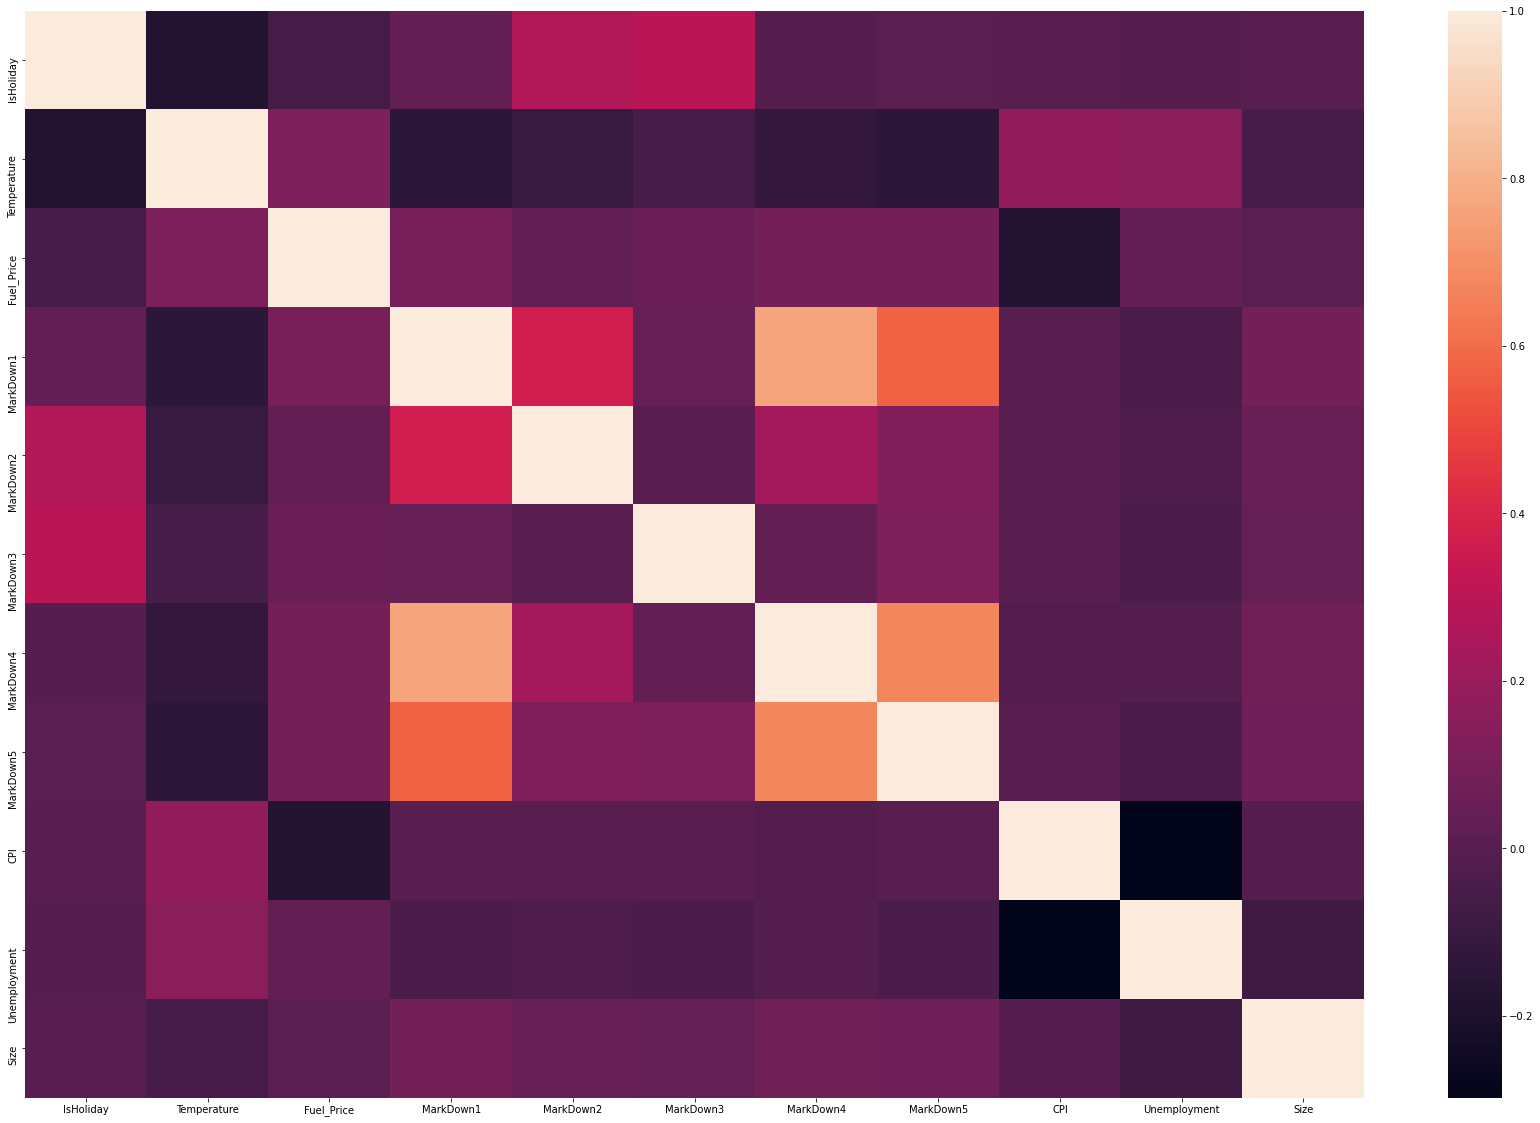

In [72]:
plt.figure(figsize=(30,20))
sns.heatmap(train_num.corr())


In [73]:
train_num.corr()

IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
IsHoliday      1.000000    -0.178936   -0.060499   0.034691   0.272442   
Temperature   -0.178936     1.000000    0.112741  -0.142848  -0.104273   
Fuel_Price    -0.060499     0.112741    1.000000   0.100885   0.029847   
MarkDown1      0.034691    -0.142848    0.100885   1.000000   0.364552   
MarkDown2      0.272442    -0.104273    0.029847   0.364552   1.000000   
MarkDown3      0.296824    -0.059504    0.054714   0.043023  -0.002048   
MarkDown4     -0.005916    -0.122611    0.092216   0.764146   0.232324   
MarkDown5      0.006201    -0.146041    0.086972   0.573937   0.122228   
CPI            0.003058     0.176811   -0.180454  -0.002877   0.001564   
Unemployment  -0.004842     0.149583    0.035137  -0.037704  -0.030700   
Size           0.000579    -0.054427    0.008287   0.082859   0.050976   

              MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  \
IsHoliday      0.296824  -0.005916   0.006201  0.003058     -0.004842   
Temperature   -0.059504  -0.122611  -0.146041  0.176811      0.149583   
Fuel_Price     0.054714   0.092216   0.086972 -0.180454      0.035137   
MarkDown1      0.043023   0.764146   0.573937 -0.002877     -0.037704   
MarkDown2     -0.002048   0.232324   0.122228  0.001564     -0.030700   
MarkDown3      1.000000   0.033797   0.116744 -0.003137     -0.034994   
MarkDown4      0.033797   1.000000   0.673759 -0.014325     -0.011361   
MarkDown5      0.116744   0.673759   1.000000  0.002884     -0.039787   
CPI           -0.003137  -0.014325   0.002884  1.000000     -0.298205   
Unemployment  -0.034994  -0.011361  -0.039787 -0.298205      1.000000   
Size           0.038361   0.077153   0.067597 -0.005275     -0.085202   

                  Size  
IsHoliday     0.000579  
Temperature  -0.054427  
Fuel_Price    0.008287  
MarkDown1     0.082859  
MarkDown2     0.050976  
MarkDown3     0.038361  
MarkDown4     0.077153  
MarkDown5     0.067597  
CPI          -0.005275  
Unemployment -0.085202  
Size          1.000000

<AxesSubplot:>

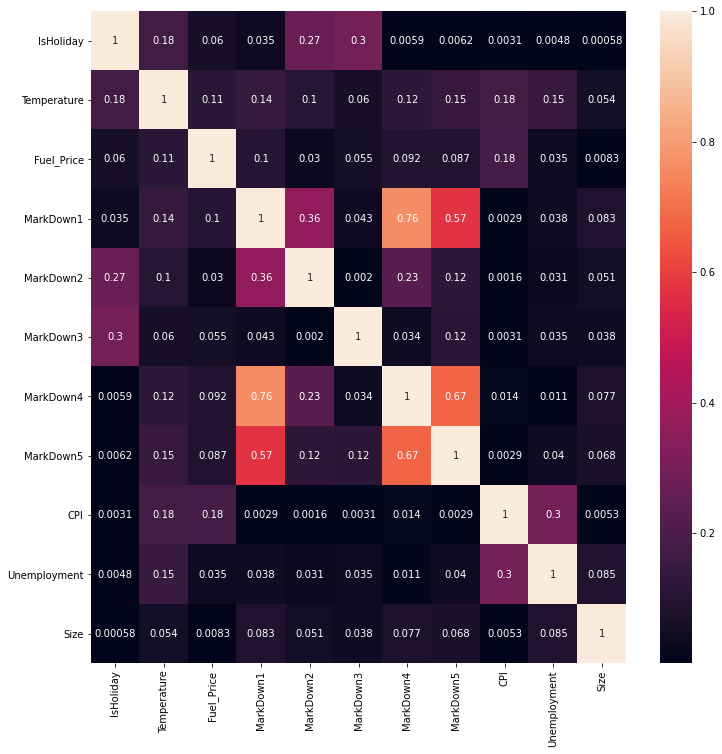

In [74]:

# plot heatmap
plt.figure(figsize=(12, 12))
vg_corr = train_num.corr().abs()
sns.heatmap(vg_corr, xticklabels = vg_corr.columns.values,yticklabels = vg_corr.columns.values, annot = True)

# Variable trend with Dependent Variable

In [75]:
combined_data_train

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0          1    1  2010-02-05      24924.50          0        42.31   
1          1    2  2010-02-05      50605.27          0        42.31   
2          1    3  2010-02-05      13740.12          0        42.31   
3          1    4  2010-02-05      39954.04          0        42.31   
4          1    5  2010-02-05      32229.38          0        42.31   
...      ...  ...         ...           ...        ...          ...   
417309    45   93  2011-12-30       1426.52          1        37.79   
417310    45   94  2011-12-30       2979.03          1        37.79   
417311    45   95  2011-12-30      42084.36          1        37.79   
417312    45   97  2011-12-30       5569.82          1        37.79   
417313    45   98  2011-12-30        553.21          1        37.79   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572       0.00       0.00       0.00       0.00       0.00   
1            2.572       0.00       0.00       0.00       0.00       0.00   
2            2.572       0.00       0.00       0.00       0.00       0.00   
3            2.572       0.00       0.00       0.00       0.00       0.00   
4            2.572       0.00       0.00       0.00       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
417309       3.389    3604.35   43941.56     287.45     357.43     750.01   
417310       3.389    3604.35   43941.56     287.45     357.43     750.01   
417311       3.389    3604.35   43941.56     287.45     357.43     750.01   
417312       3.389    3604.35   43941.56     287.45     357.43     750.01   
417313       3.389    3604.35   43941.56     287.45     357.43     750.01   

               CPI  Unemployment Type    Size      Date2  
0       211.096358         8.106    A  151315 2010-02-05  
1       211.096358         8.106    A  151315 2010-02-05  
2       211.096358         8.106    A  151315 2010-02-05  
3       211.096358         8.106    A  151315 2010-02-05  
4       211.096358         8.106    A  151315 2010-02-05  
...            ...           ...  ...     ...        ...  
417309  189.062016         8.523    B  118221 2011-12-30  
417310  189.062016         8.523    B  118221 2011-12-30  
417311  189.062016         8.523    B  118221 2011-12-30  
417312  189.062016         8.523    B  118221 2011-12-30  
417313  189.062016         8.523    B  118221 2011-12-30  

[293204 rows x 17 columns]

In [76]:
#Looking at average weekly Sales by STORE, DEPT...directly taking average will lead to incorrect result..


agg_dept=combined_data_train.groupby(['Store','Date'], as_index=False).agg({'Weekly_Sales':'sum'})
agg_dept

Store        Date  Weekly_Sales
0        1  2010-02-05    1643690.90
1        1  2010-02-12    1641957.44
2        1  2010-02-19    1612831.17
3        1  2010-02-26    1409727.59
4        1  2010-03-05    1554806.68
...    ...         ...           ...
4495     9  2011-12-02     613115.21
4496     9  2011-12-09     630387.28
4497     9  2011-12-16     705557.97
4498     9  2011-12-23     905324.68
4499     9  2011-12-30     549788.36

[4500 rows x 3 columns]

In [77]:
agg_dept2=agg_dept.groupby(['Store'], as_index=False).agg({'Weekly_Sales':'mean'})
agg_dept2

Store  Weekly_Sales
0      1  1.542039e+06
1     10  1.933937e+06
2     11  1.357799e+06
3     12  1.009554e+06
4     13  1.998104e+06
5     14  2.115601e+06
6     15  6.430724e+05
7     16  5.215199e+05
8     17  8.749728e+05
9     18  1.101966e+06
10    19  1.474245e+06
11     2  1.938904e+06
12    20  2.115731e+06
13    21  7.786755e+05
14    22  1.044206e+06
15    23  1.399844e+06
16    24  1.368300e+06
17    25  7.157098e+05
18    26  1.004401e+06
19    27  1.819369e+06
20    28  1.339425e+06
21    29  5.489777e+05
22     3  3.956343e+05
23    30  4.392131e+05
24    31  1.397301e+06
25    32  1.165392e+06
26    33  2.572477e+05
27    34  9.651283e+05
28    35  9.628829e+05
29    36  4.012586e+05
30    37  5.159005e+05
31    38  3.652881e+05
32    39  1.415607e+06
33     4  2.067737e+06
34    40  9.669916e+05
35    41  1.244544e+06
36    42  5.461644e+05
37    43  6.359129e+05
38    44  2.910611e+05
39    45  7.967362e+05
40     5  3.130725e+05
41     6  1.574430e+06
42     7  5.623148e+05
43     8  9.071759e+05
44     9  5.381672e+05

<BarContainer object of 45 artists>

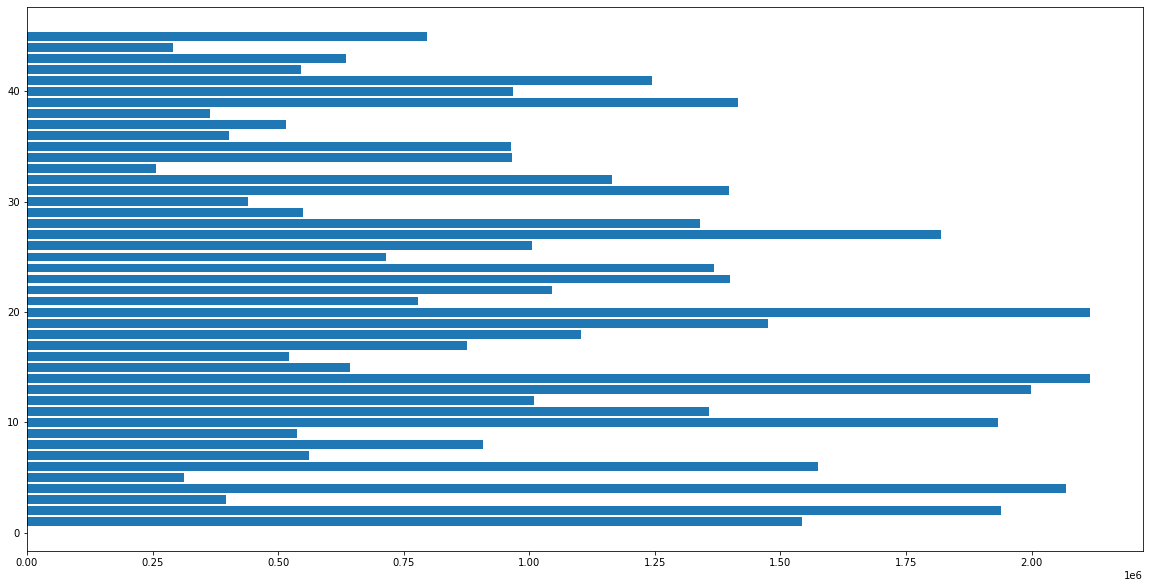

In [78]:
# convert to numeric varibale then sort values

agg_dept2['Store']=pd.to_numeric(agg_dept2['Store'])
agg_dept2.sort_values('Store',inplace=True)
plt.figure(figsize=(20,10))
plt.barh(agg_dept2['Store'], agg_dept2['Weekly_Sales'])

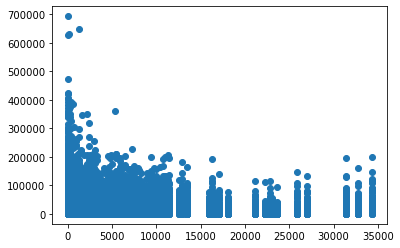

In [79]:
plt.scatter(combined_data_train['MarkDown1'], combined_data_train['Weekly_Sales'])

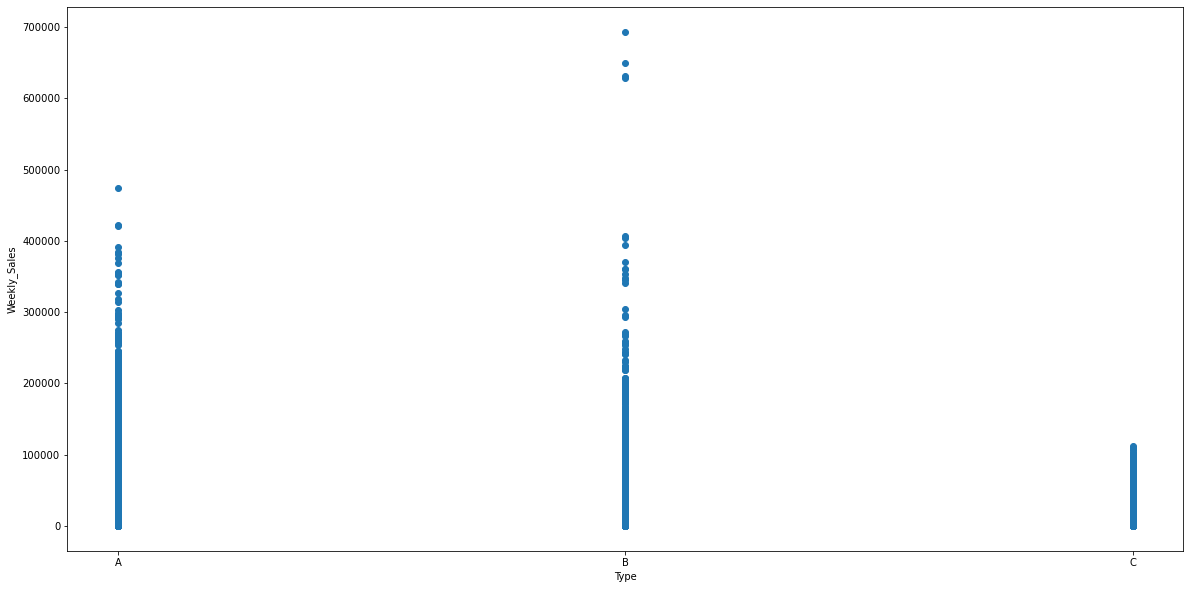

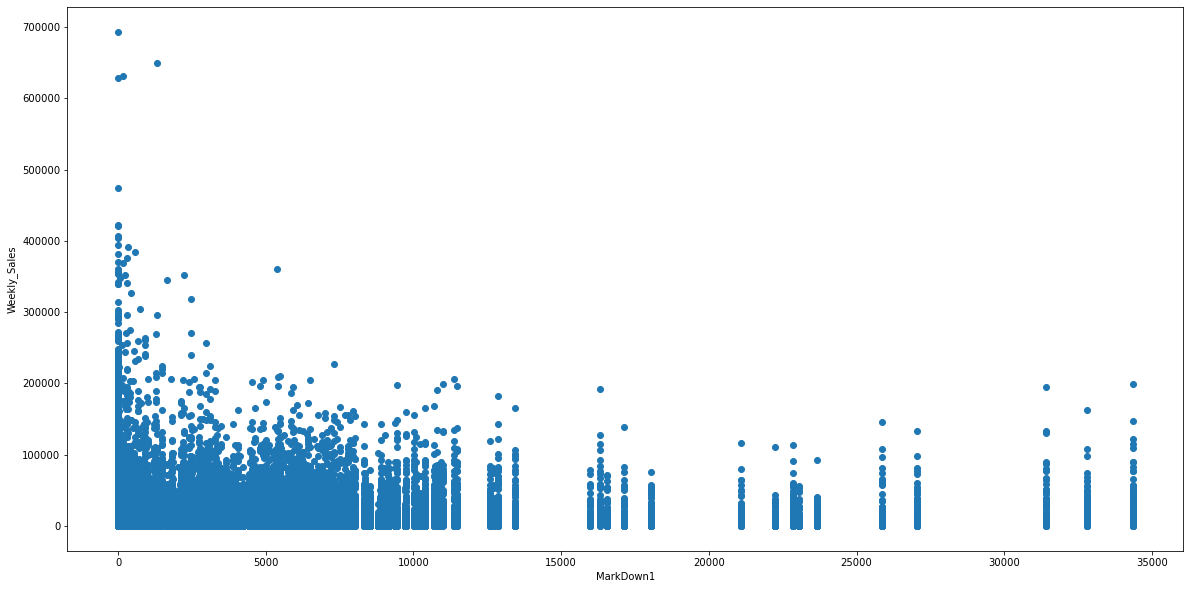

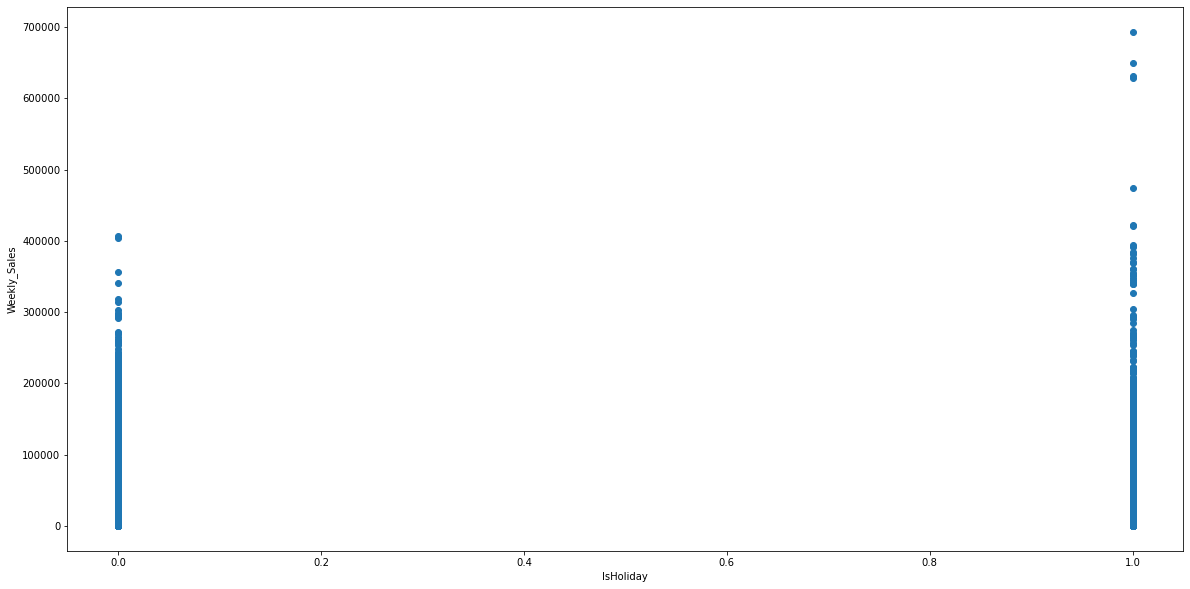

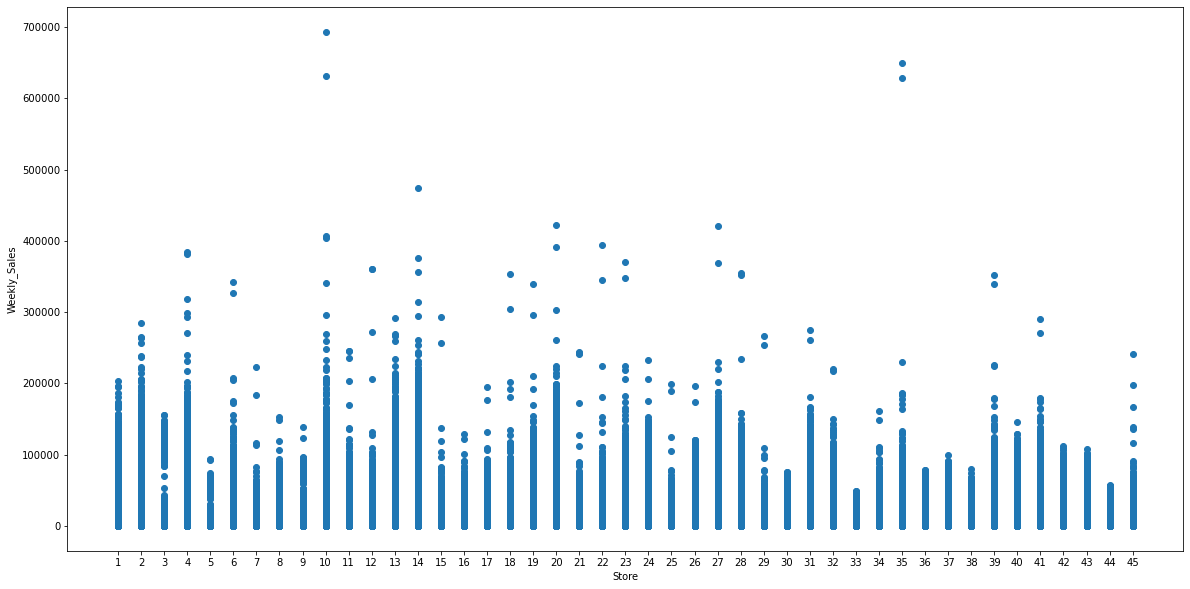

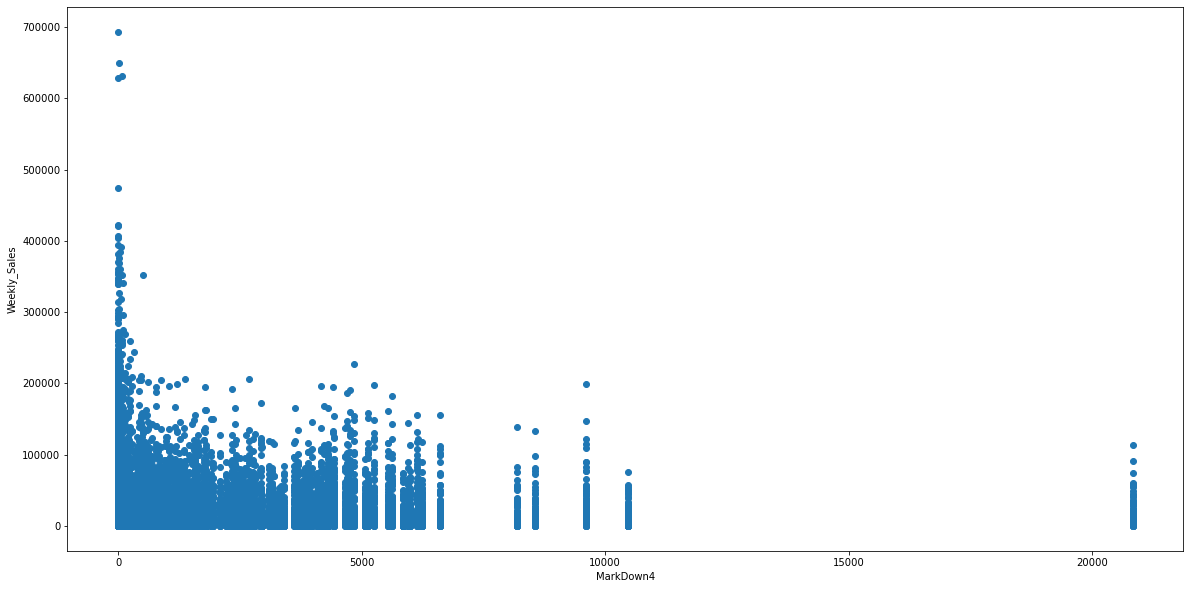

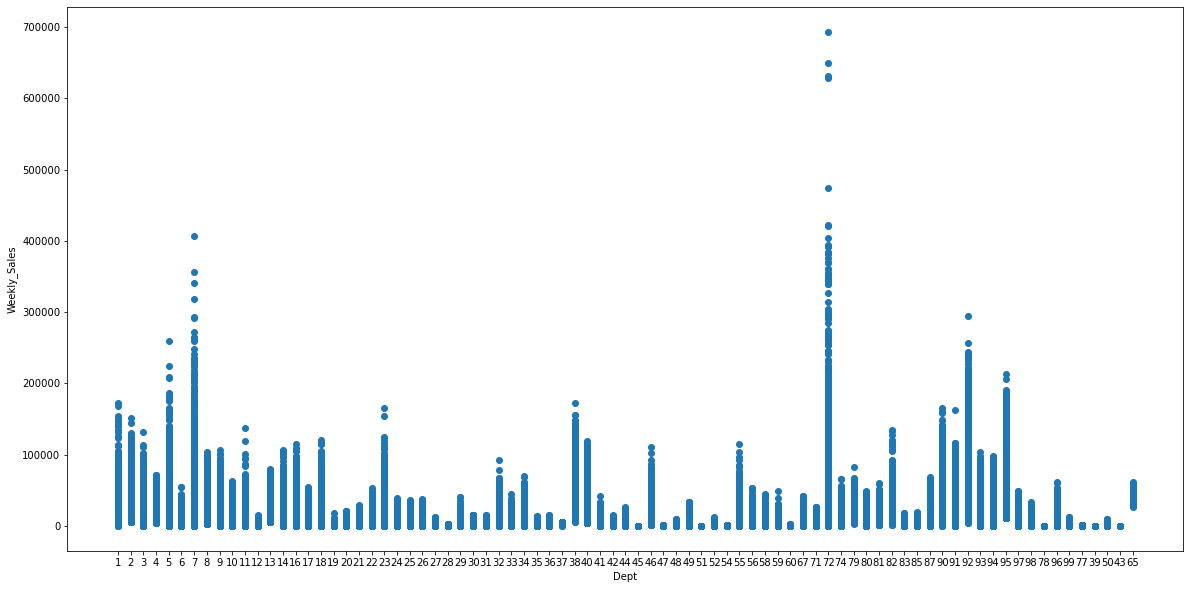

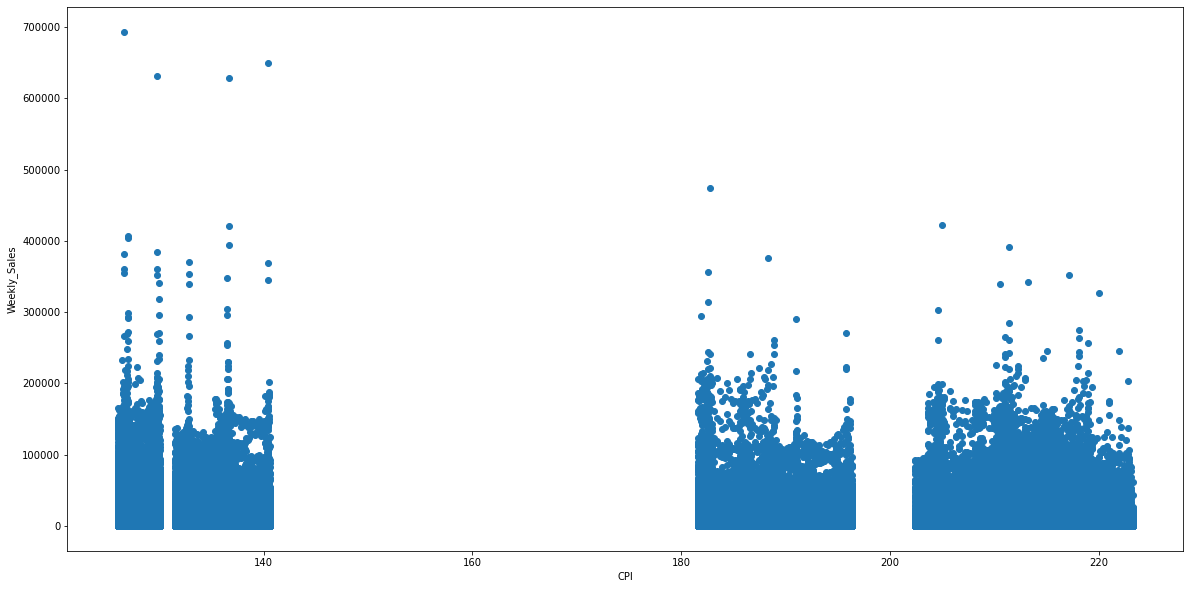

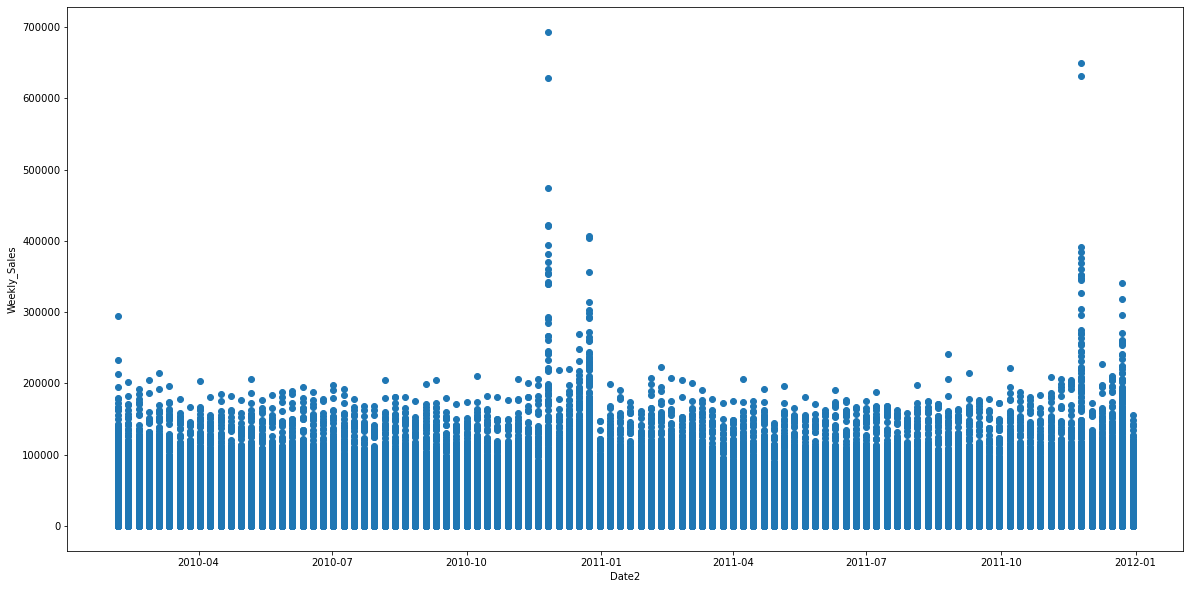

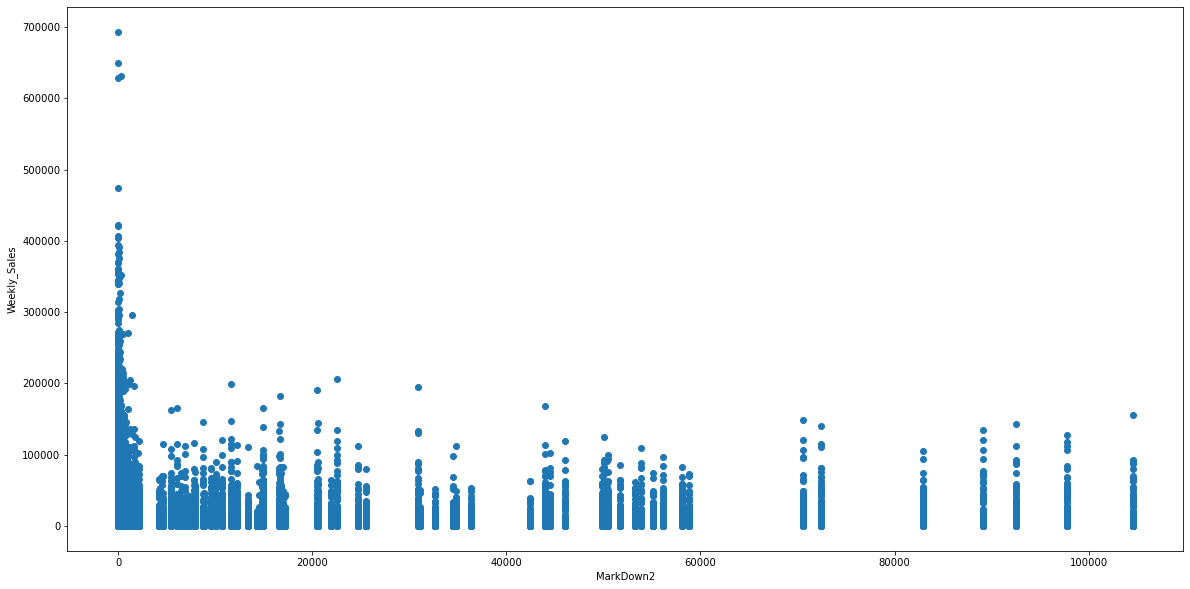

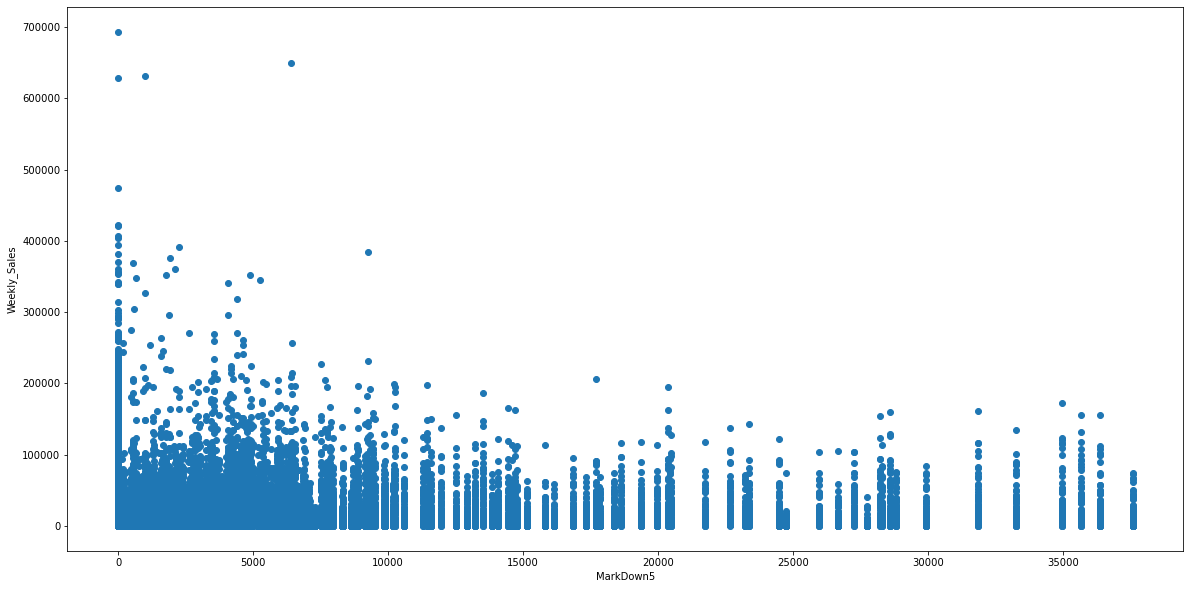

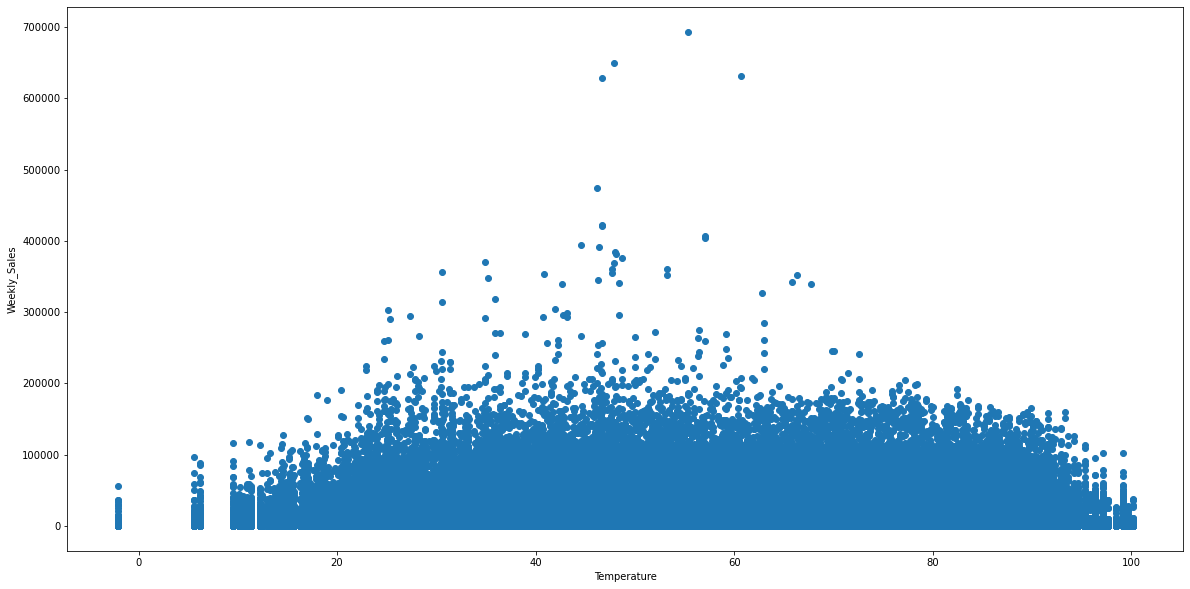

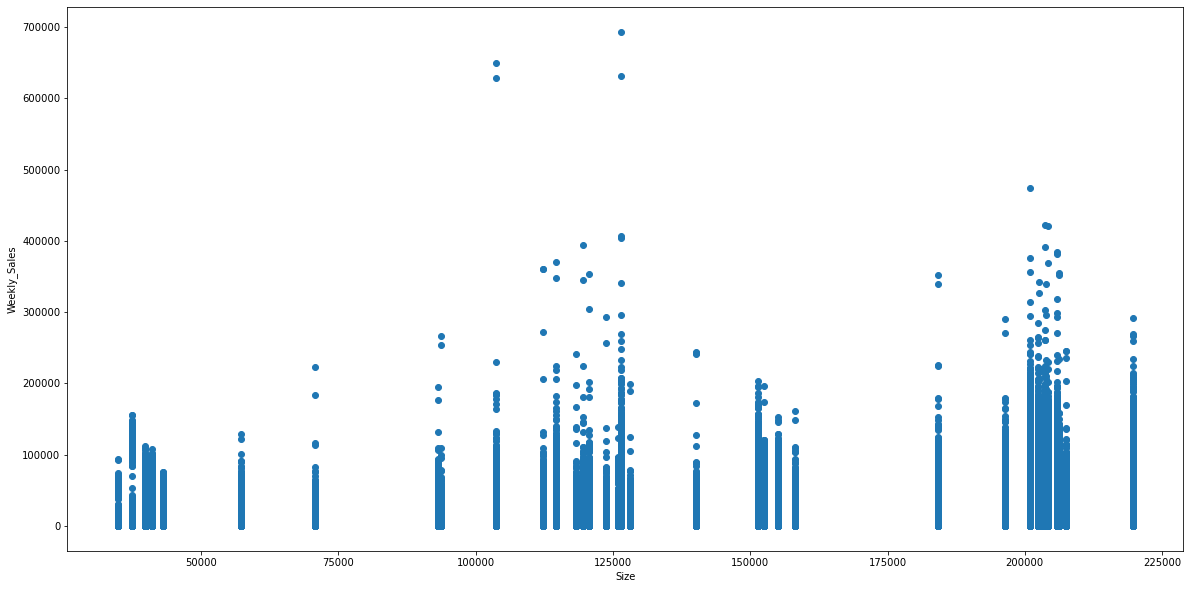

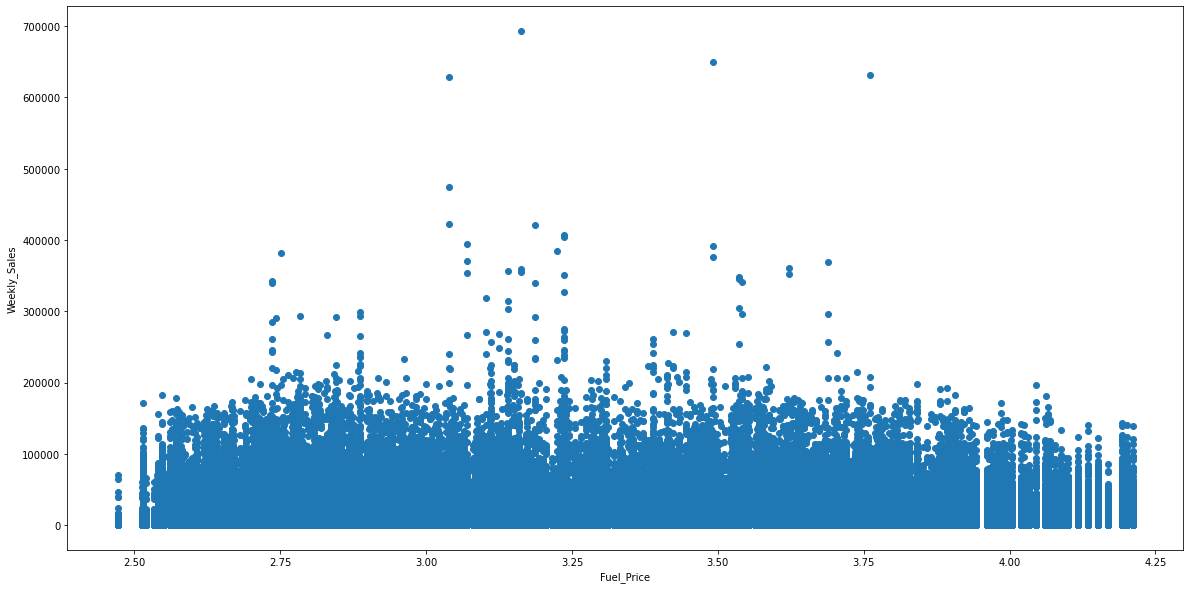

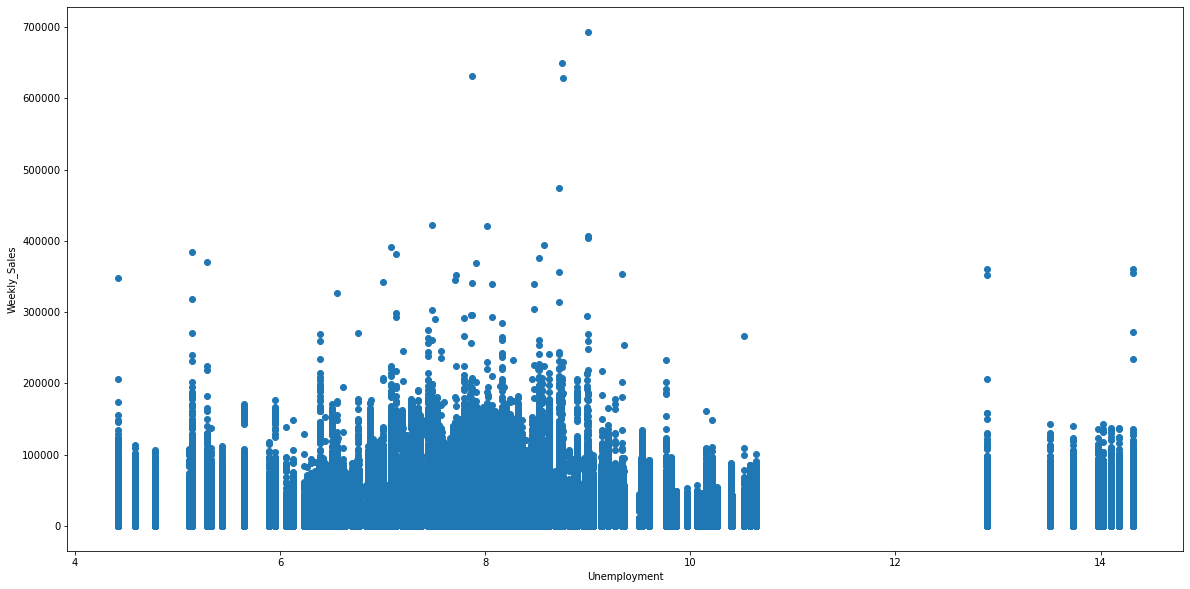

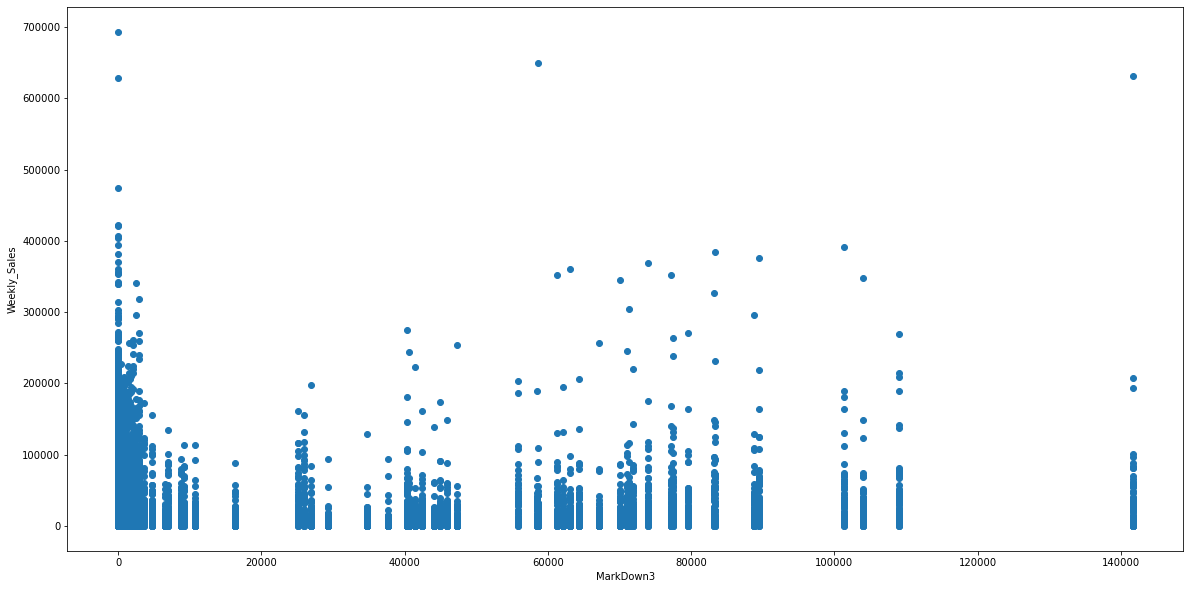

In [80]:
#Using scatter plot to check trend of predictors with dependent variable

var_list=[x for x in combined_data_train.columns]
columnstodrop=['Weekly_Sales','Date']
var_list=list(set(var_list).difference(set(columnstodrop)))
for varname in var_list:
    plt.figure(figsize=(20,10))
    plt.scatter(combined_data_train[varname], combined_data_train['Weekly_Sales'])
    plt.xlabel(varname)
    plt.ylabel('Weekly_Sales')

In [81]:
#check trend of dependent variable with other variables
all_corr = combined_data_train.corr().unstack().reset_index()
print(all_corr.shape)
corr_table = all_corr[all_corr['level_1'] =='Weekly_Sales' ]
corr_table = corr_table.loc[ (corr_table['level_0'] != 'Weekly_Sales') ]
print(corr_table.shape)
corr_table.columns = ['var1', 'var2', 'corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by= ['corr_abs'], ascending = False )
corr_table

(144, 3)
(11, 3)


var1          var2  corr_value  corr_abs
132          Size  Weekly_Sales    0.242929  0.242929
72      MarkDown3  Weekly_Sales    0.044642  0.044642
96      MarkDown5  Weekly_Sales    0.038685  0.038685
48      MarkDown1  Weekly_Sales    0.035576  0.035576
84      MarkDown4  Weekly_Sales    0.031970  0.031970
120  Unemployment  Weekly_Sales   -0.025631  0.025631
108           CPI  Weekly_Sales   -0.021871  0.021871
60      MarkDown2  Weekly_Sales    0.016028  0.016028
12      IsHoliday  Weekly_Sales    0.013925  0.013925
24    Temperature  Weekly_Sales   -0.007911  0.007911
36     Fuel_Price  Weekly_Sales    0.004312  0.004312

#  Date trends

In [82]:
combined_data_train['week_number']=combined_data_train['Date2'].dt.week
combined_data_train['year_number']=combined_data_train['Date2'].dt.year

<ipython-input-82-e8e145cbfaec>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  combined_data_train['week_number']=combined_data_train['Date2'].dt.week
<ipython-input-82-e8e145cbfaec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_train['week_number']=combined_data_train['Date2'].dt.week
<ipython-input-82-e8e145cbfaec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_train['year_number']=combine

In [83]:
combined_data_train

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0          1    1  2010-02-05      24924.50          0        42.31   
1          1    2  2010-02-05      50605.27          0        42.31   
2          1    3  2010-02-05      13740.12          0        42.31   
3          1    4  2010-02-05      39954.04          0        42.31   
4          1    5  2010-02-05      32229.38          0        42.31   
...      ...  ...         ...           ...        ...          ...   
417309    45   93  2011-12-30       1426.52          1        37.79   
417310    45   94  2011-12-30       2979.03          1        37.79   
417311    45   95  2011-12-30      42084.36          1        37.79   
417312    45   97  2011-12-30       5569.82          1        37.79   
417313    45   98  2011-12-30        553.21          1        37.79   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572       0.00       0.00       0.00       0.00       0.00   
1            2.572       0.00       0.00       0.00       0.00       0.00   
2            2.572       0.00       0.00       0.00       0.00       0.00   
3            2.572       0.00       0.00       0.00       0.00       0.00   
4            2.572       0.00       0.00       0.00       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
417309       3.389    3604.35   43941.56     287.45     357.43     750.01   
417310       3.389    3604.35   43941.56     287.45     357.43     750.01   
417311       3.389    3604.35   43941.56     287.45     357.43     750.01   
417312       3.389    3604.35   43941.56     287.45     357.43     750.01   
417313       3.389    3604.35   43941.56     287.45     357.43     750.01   

               CPI  Unemployment Type    Size      Date2  week_number  \
0       211.096358         8.106    A  151315 2010-02-05            5   
1       211.096358         8.106    A  151315 2010-02-05            5   
2       211.096358         8.106    A  151315 2010-02-05            5   
3       211.096358         8.106    A  151315 2010-02-05            5   
4       211.096358         8.106    A  151315 2010-02-05            5   
...            ...           ...  ...     ...        ...          ...   
417309  189.062016         8.523    B  118221 2011-12-30           52   
417310  189.062016         8.523    B  118221 2011-12-30           52   
417311  189.062016         8.523    B  118221 2011-12-30           52   
417312  189.062016         8.523    B  118221 2011-12-30           52   
417313  189.062016         8.523    B  118221 2011-12-30           52   

        year_number  
0              2010  
1              2010  
2              2010  
3              2010  
4              2010  
...             ...  
417309         2011  
417310         2011  
417311         2011  
417312         2011  
417313         2011  

[293204 rows x 19 columns]

In [84]:

#Checking the holiday weeks with highest total sales 
temper = combined_data_train.groupby(['Date', 'IsHoliday', 'week_number', 'year_number'], as_index=False).agg({'Weekly_Sales':'sum'})
temper.loc[temper['IsHoliday'] == 1].sort_values(by = 'Weekly_Sales', ascending=False)

Date  IsHoliday  week_number  year_number  Weekly_Sales
94  2011-11-25          1           47         2011   66593835.85
42  2010-11-26          1           47         2010   65821216.26
1   2010-02-12          1            6         2010   48336800.10
53  2011-02-11          1            6         2011   47336816.90
83  2011-09-09          1           36         2011   46763760.42
99  2011-12-30          1           52         2011   46044300.91
31  2010-09-10          1           36         2010   45635418.66
47  2010-12-31          1           52         2010   40434740.42

In [85]:
# we find that the highest sales is not from holiday
temper.sort_values(by = 'Weekly_Sales', ascending=False)

Date  IsHoliday  week_number  year_number  Weekly_Sales
46  2010-12-24          0           51         2010   80931586.20
98  2011-12-23          0           51         2011   76999773.57
94  2011-11-25          1           47         2011   66593835.85
42  2010-11-26          1           47         2010   65821216.26
45  2010-12-17          0           50         2010   61821317.85
..         ...        ...          ...          ...           ...
33  2010-09-24          0           38         2010   41359671.97
49  2011-01-14          0            2         2011   40673850.98
50  2011-01-21          0            3         2011   40654860.31
47  2010-12-31          1           52         2010   40434740.42
51  2011-01-28          0            4         2011   39600376.50

[100 rows x 5 columns]

<AxesSubplot:title={'center':'Total Juxtaposed Weekly Sales'}, xlabel='week_number', ylabel='Weekly_Sales'>

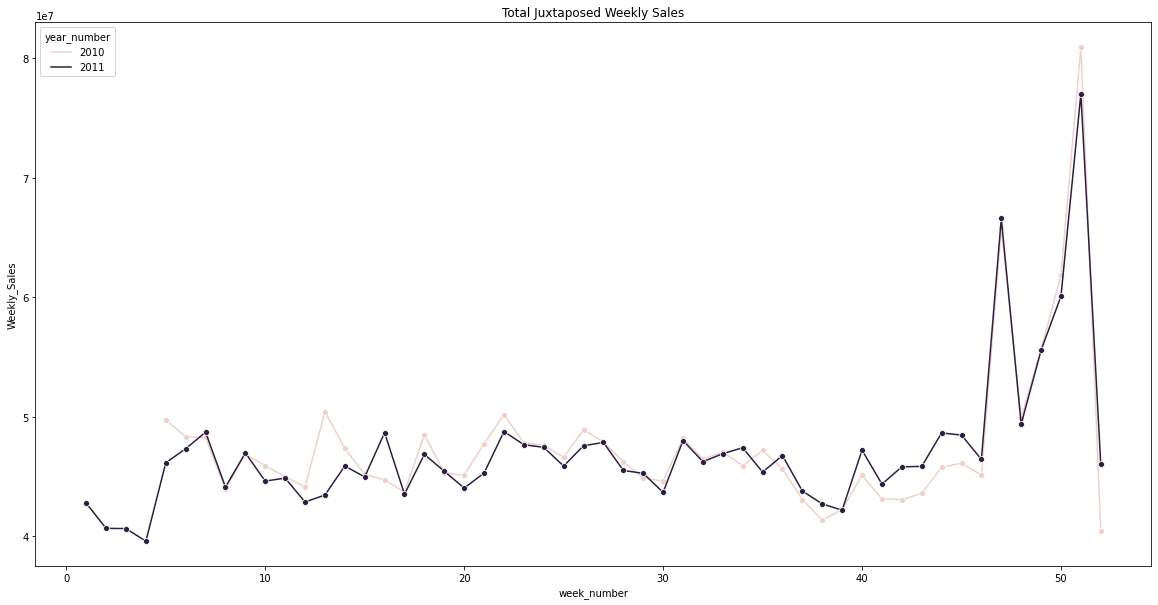

In [86]:
# Checking weekly Sales of different years juxtaposed

another_agg = combined_data_train.groupby(['week_number', 'year_number', 'IsHoliday'], as_index=False).agg({ 'Weekly_Sales' : 'sum'})
plt.figure(figsize=(20,10))
plt.title('Total Juxtaposed Weekly Sales')
sns.lineplot(x="week_number", y="Weekly_Sales",hue="year_number",data = another_agg, marker = 'o')

          Date2 Store  Weekly_Sales
2075 2010-12-24    14    3818686.45
2082 2010-12-24    20    3766687.43
2071 2010-12-24    10    3749057.69
4443 2011-12-23     4    3676388.98
2074 2010-12-24    13    3595903.20
4414 2011-12-23    13    3556766.03
4422 2011-12-23    20    3555379.47
2103 2010-12-24     4    3526713.39
4411 2011-12-23    10    3487986.89
2081 2010-12-24     2    3436154.68
          Date2 Dept  Weekly_Sales
3301 2010-11-26   72   10533640.92
7292 2011-11-25   72   10089874.40
3605 2010-12-24    7    6490778.39
3607 2010-12-24   72    6020196.03
7606 2011-12-23    7    5535941.35
7608 2011-12-23   72    5028104.79
7623 2011-12-23   92    4647997.52
7307 2011-11-25   92    4330784.59
3620 2010-12-24   92    4203774.33
7543 2011-12-16   92    4093797.82


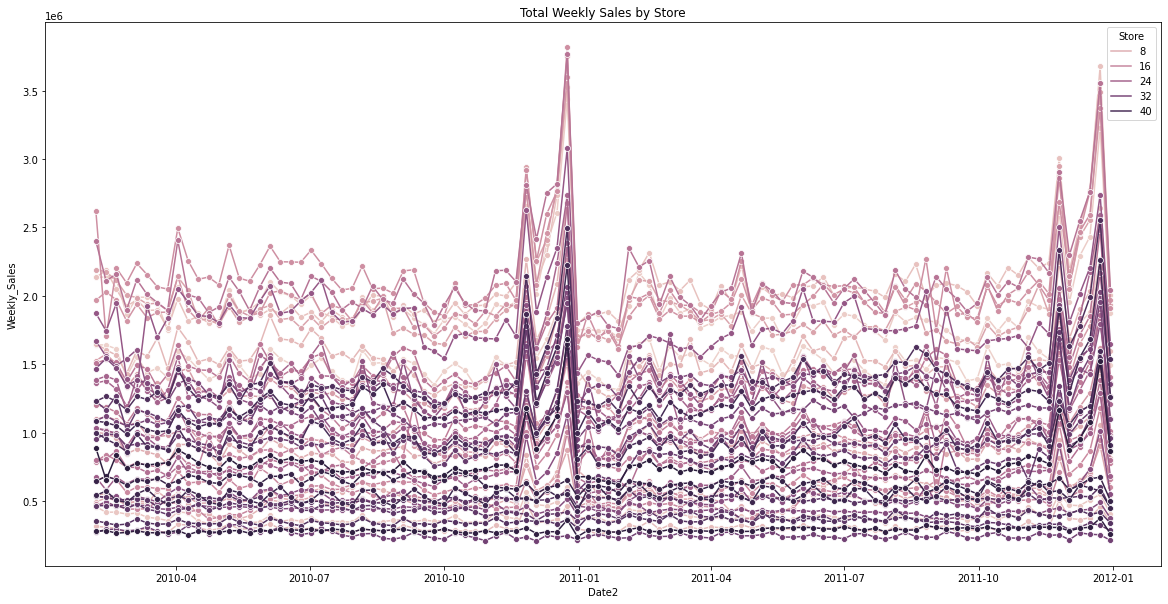

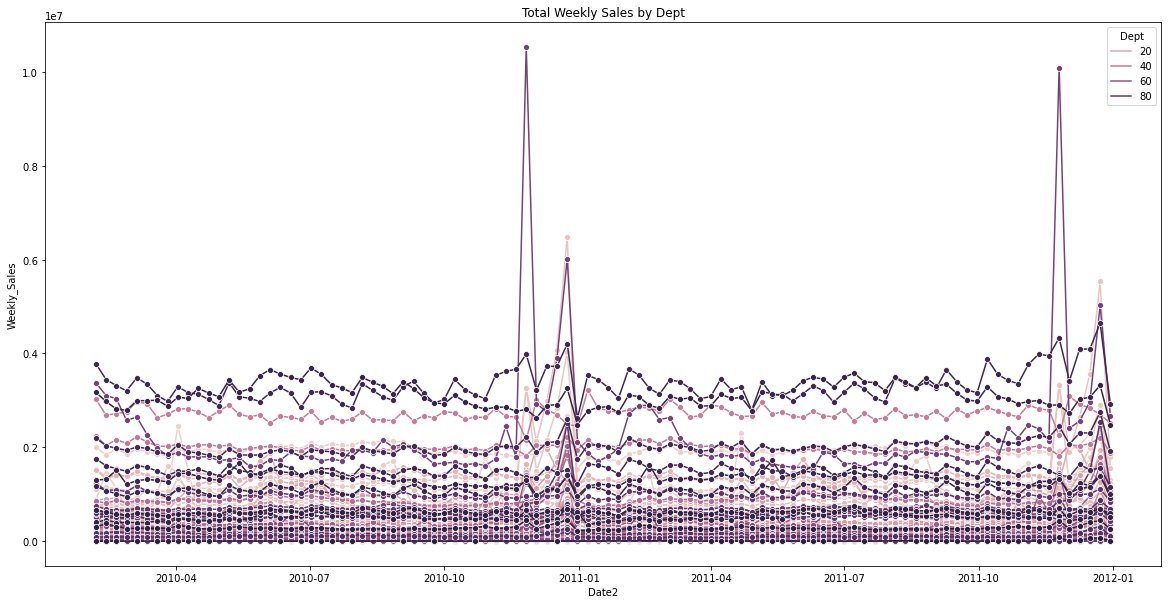

In [87]:
#Checking total weekly Sales of different Stores and dept 
# 对于var 是store 或者dept， 这是一个list
for var in ['Store', 'Dept']:
    agg_temp=combined_data_train.groupby(['Date2', var], as_index=False).agg({'Weekly_Sales':'sum'})
    print(agg_temp.sort_values(by='Weekly_Sales', ascending=False).head(10))
    plt.figure(figsize=(20,10))
    plt.title('Total Weekly Sales by ' + var)
    agg_temp[var]=pd.to_numeric(agg_temp[var])#The hue variable has to be numerical 
    sns.lineplot(x="Date2", y="Weekly_Sales", hue=var, data = agg_temp, marker = 'o')

# Feature Creation

In [88]:
#marking the holiday names
conditions = [combined_data_train['IsHoliday'] == 0, combined_data_train['week_number'] == 52, combined_data_train['week_number'] == 47, \
             combined_data_train['week_number'] == 36, combined_data_train['week_number'] == 6]
choices = ['no_holiday', 'christmas', 'thanksgiving', 'labor_day', 'super_bowl']


In [89]:
combined_data_train['holiday_type' ] = np.select(conditions, choices, default=np.nan)
combined_data_train['holiday_type'].value_counts()

<ipython-input-89-38ad8f00ee95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_train['holiday_type' ] = np.select(conditions, choices, default=np.nan)


no_holiday      269595
thanksgiving      5946
christmas         5909
super_bowl        5879
labor_day         5875
Name: holiday_type, dtype: int64

In [90]:
combined_data_train

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0          1    1  2010-02-05      24924.50          0        42.31   
1          1    2  2010-02-05      50605.27          0        42.31   
2          1    3  2010-02-05      13740.12          0        42.31   
3          1    4  2010-02-05      39954.04          0        42.31   
4          1    5  2010-02-05      32229.38          0        42.31   
...      ...  ...         ...           ...        ...          ...   
417309    45   93  2011-12-30       1426.52          1        37.79   
417310    45   94  2011-12-30       2979.03          1        37.79   
417311    45   95  2011-12-30      42084.36          1        37.79   
417312    45   97  2011-12-30       5569.82          1        37.79   
417313    45   98  2011-12-30        553.21          1        37.79   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572       0.00       0.00       0.00       0.00       0.00   
1            2.572       0.00       0.00       0.00       0.00       0.00   
2            2.572       0.00       0.00       0.00       0.00       0.00   
3            2.572       0.00       0.00       0.00       0.00       0.00   
4            2.572       0.00       0.00       0.00       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
417309       3.389    3604.35   43941.56     287.45     357.43     750.01   
417310       3.389    3604.35   43941.56     287.45     357.43     750.01   
417311       3.389    3604.35   43941.56     287.45     357.43     750.01   
417312       3.389    3604.35   43941.56     287.45     357.43     750.01   
417313       3.389    3604.35   43941.56     287.45     357.43     750.01   

               CPI  Unemployment Type    Size      Date2  week_number  \
0       211.096358         8.106    A  151315 2010-02-05            5   
1       211.096358         8.106    A  151315 2010-02-05            5   
2       211.096358         8.106    A  151315 2010-02-05            5   
3       211.096358         8.106    A  151315 2010-02-05            5   
4       211.096358         8.106    A  151315 2010-02-05            5   
...            ...           ...  ...     ...        ...          ...   
417309  189.062016         8.523    B  118221 2011-12-30           52   
417310  189.062016         8.523    B  118221 2011-12-30           52   
417311  189.062016         8.523    B  118221 2011-12-30           52   
417312  189.062016         8.523    B  118221 2011-12-30           52   
417313  189.062016         8.523    B  118221 2011-12-30           52   

        year_number holiday_type  
0              2010   no_holiday  
1              2010   no_holiday  
2              2010   no_holiday  
3              2010   no_holiday  
4              2010   no_holiday  
...             ...          ...  
417309         2011    christmas  
417310         2011    christmas  
417311         2011    christmas  
417312         2011    christmas  
417313         2011    christmas  

[293204 rows x 20 columns]

In [91]:
#function to create sales rush weeks 
def season_variables(df):
    df['week_number'] = df['Date2'].dt.week
    df['year_number'] = df['Date2'].dt.year
    conditions = [df['IsHoliday'] == 0, df['week_number'] == 52, df['week_number'] == 47, \
                 df['week_number'] == 36, df['week_number'] == 6]
    choices = ['no_holiday', 'christmas', 'thanksgiving', 'labor_day', 'super_bowl']
    df['holiday_type' ] = np.select(conditions, choices, default=np.nan)
    print(df['holiday_type'].value_counts())
    christmas_df = pd.DataFrame(df[df['holiday_type'] == 'christmas' ]['Date2'].unique())
    christmas_df.columns = ['christmas_week']
    christmas_df['minus1'] = christmas_df['christmas_week'] -  pd.to_timedelta(7, unit='d')
    christmas_df['minus2'] = christmas_df['christmas_week'] -  pd.to_timedelta(14, unit='d')
    christmas_df['minus3'] = christmas_df['christmas_week'] -  pd.to_timedelta(21, unit='d')
    #creating all the 5 binary variables
    df['christmas_week'] = np.where(df['Date2'].isin(list(christmas_df['christmas_week']) ),1,0 )
    df['christmas_minus1'] = np.where(df['Date2'].isin(list(christmas_df['minus1']) ),1,0 )
    df['christmas_minus2'] = np.where(df['Date2'].isin(list(christmas_df['minus2']) ),1,0 )
    df['christmas_minus3'] = np.where(df['Date2'].isin(list(christmas_df['minus3']) ),1,0 )
    df['thanksgiving_week'] = np.where(df['holiday_type'] == 'thanksgiving', 1, 0)
    print(df['christmas_week'].value_counts())
    print(df['christmas_minus1'].value_counts())
    print(df['christmas_minus2'].value_counts())
    print(df['christmas_minus3'].value_counts())
    print(df['thanksgiving_week'].value_counts())
    return df

In [92]:
combined_data_train = season_variables(combined_data_train)

<ipython-input-91-d67b45ec3a7d>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_number'] = df['Date2'].dt.week
<ipython-input-91-d67b45ec3a7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_number'] = df['Date2'].dt.week
<ipython-input-91-d67b45ec3a7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_number'] = df['Date2'].dt.year
<ipython-input-91-d67b45ec3a7d>:8: SettingWithCopyWarning: 
A valu

no_holiday      269595
thanksgiving      5946
christmas         5909
super_bowl        5879
labor_day         5875
Name: holiday_type, dtype: int64
0    287295
1      5909
Name: christmas_week, dtype: int64
0    287234
1      5970
Name: christmas_minus1, dtype: int64
0    287251
1      5953
Name: christmas_minus2, dtype: int64
0    287266
1      5938
Name: christmas_minus3, dtype: int64
0    287258
1      5946
Name: thanksgiving_week, dtype: int64


<ipython-input-91-d67b45ec3a7d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['christmas_week'] = np.where(df['Date2'].isin(list(christmas_df['christmas_week']) ),1,0 )
<ipython-input-91-d67b45ec3a7d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['christmas_minus1'] = np.where(df['Date2'].isin(list(christmas_df['minus1']) ),1,0 )
<ipython-input-91-d67b45ec3a7d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [93]:
combined_data_test = season_variables(combined_data_test)

<ipython-input-91-d67b45ec3a7d>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_number'] = df['Date2'].dt.week
<ipython-input-91-d67b45ec3a7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_number'] = df['Date2'].dt.week
<ipython-input-91-d67b45ec3a7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_number'] = df['Date2'].dt.year
<ipython-input-91-d67b45ec3a7d>:8: SettingWithCopyWarning: 
A valu

no_holiday    121057
super_bowl      2994
labor_day       2957
Name: holiday_type, dtype: int64
0    127008
Name: christmas_week, dtype: int64
0    127008
Name: christmas_minus1, dtype: int64
0    127008
Name: christmas_minus2, dtype: int64
0    127008
Name: christmas_minus3, dtype: int64
0    127008
Name: thanksgiving_week, dtype: int64


In [94]:
#Creating another feature..Prediction based on Store and Dept
store_dept_median = combined_data_train.groupby(['Store', 'Dept'], as_index=False).agg({'Weekly_Sales' :  ['median']})
print(store_dept_median.shape)
store_dept_median.columns = ["_".join(x) for x in store_dept_median.columns.ravel()]
store_dept_median.columns = ['Store', 'Dept', 'Weekly_Sales_median']
print(store_dept_median.head())

(3292, 3)
  Store Dept  Weekly_Sales_median
0     1    1            18988.700
1     1   10            30870.720
2     1   11            23574.725
3     1   12            10607.065
4     1   13            37848.040


In [95]:
#Adding the feature into train and test data
print(combined_data_train.shape)
combined_data_train2 = pd.merge(combined_data_train, store_dept_median, on=['Store', 'Dept'], how='left')
print(combined_data_train2.shape)
print(combined_data_test.shape)
combined_data_test2 = pd.merge(combined_data_test, store_dept_median, on=['Store', 'Dept'], how='left')
print(combined_data_test2.shape)

(293204, 25)
(293204, 26)
(127008, 25)
(127008, 26)


In [96]:
#Filling the few missing values for new feature in test data with mean
combined_data_test2['Weekly_Sales_median'].fillna(combined_data_test2['Weekly_Sales_median'].mean() , inplace=True)

# Modeling

In [97]:
#Prediction based on Store, Dept and Week

In [98]:
simple_prediction=combined_data_train.groupby(['Store','Dept','week_number'],as_index=False).agg({'Weekly_Sales':['mean','count']})

In [99]:
simple_prediction

Store Dept week_number Weekly_Sales      
                                      mean count
0          1    1           1     15984.24     1
1          1    1           2     17359.70     1
2          1    1           3     17341.47     1
3          1    1           4     18461.18     1
4          1    1           5     23295.13     2
...      ...  ...         ...          ...   ...
155974     9   98          47        60.75     1
155975     9   98          48        54.75     1
155976     9   98          49        75.77     1
155977     9   98          50        66.75     1
155978     9   98          51        25.50     1

[155979 rows x 5 columns]

In [100]:
# ravel() functions returns contiguous flattened array

In [101]:
simple_prediction.columns=["_".join(x) for x in simple_prediction.columns.ravel()]

In [102]:
simple_prediction=simple_prediction.drop(['Weekly_Sales_count'],axis=1)

In [103]:
simple_prediction

Store_ Dept_  week_number_  Weekly_Sales_mean
0           1     1             1           15984.24
1           1     1             2           17359.70
2           1     1             3           17341.47
3           1     1             4           18461.18
4           1     1             5           23295.13
...       ...   ...           ...                ...
155974      9    98            47              60.75
155975      9    98            48              54.75
155976      9    98            49              75.77
155977      9    98            50              66.75
155978      9    98            51              25.50

[155979 rows x 4 columns]

In [104]:
simple_prediction.columns = ['Store', 'Dept', 'week_number', 'Sales_prediction']
simple_prediction

Store Dept  week_number  Sales_prediction
0          1    1            1          15984.24
1          1    1            2          17359.70
2          1    1            3          17341.47
3          1    1            4          18461.18
4          1    1            5          23295.13
...      ...  ...          ...               ...
155974     9   98           47             60.75
155975     9   98           48             54.75
155976     9   98           49             75.77
155977     9   98           50             66.75
155978     9   98           51             25.50

[155979 rows x 4 columns]

In [105]:
simple_prediction['prediction_type'] = 1
simple_prediction.head()

Store Dept  week_number  Sales_prediction  prediction_type
0     1    1            1          15984.24                1
1     1    1            2          17359.70                1
2     1    1            3          17341.47                1
3     1    1            4          18461.18                1
4     1    1            5          23295.13                1

In [106]:
pd.merge(combined_data_test, simple_prediction, on = ['Store', 'Dept', 'week_number']).shape

(124366, 27)

In [107]:
#Prediction based on Dept..since previous prediction will miss required combinations..
#this is being done to provide approximation for sales in a dept irrespective of size 
moresimple_prediction = combined_data_train.groupby(['Dept'], as_index=False).agg({'Weekly_Sales' :  ['mean', 'count' ]})
print(moresimple_prediction.shape)
moresimple_prediction.columns = ["_".join(x) for x in moresimple_prediction.columns.ravel()]
print(moresimple_prediction['Weekly_Sales_count'].describe())
moresimple_prediction = moresimple_prediction.drop(['Weekly_Sales_count'], axis=1)
moresimple_prediction.columns = ['Dept', 'Sales_prediction']
moresimple_prediction['prediction_type'] = 2
moresimple_prediction.head()

(81, 3)
count      81.000000
mean     3619.802469
std      1331.333180
min         6.000000
25%      3705.000000
50%      4115.000000
75%      4500.000000
max      4500.000000
Name: Weekly_Sales_count, dtype: float64


Dept  Sales_prediction  prediction_type
0    1      19598.410840                2
1   10      18246.069967                2
2   11      14668.411385                2
3   12       4151.166962                2
4   13      30624.612680                2

In [108]:
#making sure there is no more than one entry for this combo
def score_direct(df_to_score, pred_df1, pred_df2):
    """
    We will use the 2 set of predictions made to estimate sales on the test data 
    """
    df_to_score['week_number'] =  df_to_score['Date2'].dt.week
    df_input = df_to_score[['Store', 'Dept', 'Date2',  'week_number']]
    print(df_input.shape)
    #checking if there is only 1 entry per combination being used to predict (i.e. Store, Dept, Week Number)
    print( df_input.groupby(['Store', 'Dept', 'week_number']).size().shape )
    #Using prediction1 and separate out combinations that remain unscored
    df_scored = pd.merge(df_input, pred_df1, on= ['Store', 'Dept', 'week_number'], how='left')
    df_present = df_scored[ pd.isnull(df_scored['prediction_type']) ==False ]
    df_missed =  df_scored[ pd.isnull(df_scored['prediction_type']) ]
    df_missed = df_missed.drop(['Sales_prediction', 'prediction_type'], axis=1)
    #using prediction2 to score the unscored test data
    df_missed_scored = pd.merge(df_missed, pred_df2, on= ['Dept'], how='left')
    print(df_missed_scored['prediction_type'].isna().sum())    
    #getting the scored test data in single DF
    df_full_scored = pd.concat( [df_present, df_missed_scored ] , axis=0)
    print(df_full_scored.shape)
    print(df_full_scored['prediction_type'].value_counts() )
    return df_full_scored

In [109]:
test_full_scored = score_direct(combined_data_test, simple_prediction, moresimple_prediction)

(127008, 4)
(127008,)
0
(127008, 6)
1.0    124366
2.0      2642
Name: prediction_type, dtype: int64


<ipython-input-108-c8f2508644b9>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_to_score['week_number'] =  df_to_score['Date2'].dt.week
<ipython-input-108-c8f2508644b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_score['week_number'] =  df_to_score['Date2'].dt.week


# Prediction 2 - Random Forest Regression

In [110]:
cat_columns = ['Type']
combined_data_train2 = pd.concat([combined_data_train2, pd.get_dummies(combined_data_train2[cat_columns], drop_first=True)], axis=1)
combined_data_test2 = pd.concat([combined_data_test2, pd.get_dummies(combined_data_test2[cat_columns], drop_first=True)], axis=1)

In [111]:
combined_data_train2

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0          1    1  2010-02-05      24924.50          0        42.31   
1          1    2  2010-02-05      50605.27          0        42.31   
2          1    3  2010-02-05      13740.12          0        42.31   
3          1    4  2010-02-05      39954.04          0        42.31   
4          1    5  2010-02-05      32229.38          0        42.31   
...      ...  ...         ...           ...        ...          ...   
293199    45   93  2011-12-30       1426.52          1        37.79   
293200    45   94  2011-12-30       2979.03          1        37.79   
293201    45   95  2011-12-30      42084.36          1        37.79   
293202    45   97  2011-12-30       5569.82          1        37.79   
293203    45   98  2011-12-30        553.21          1        37.79   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  year_number  \
0            2.572       0.00       0.00       0.00  ...         2010   
1            2.572       0.00       0.00       0.00  ...         2010   
2            2.572       0.00       0.00       0.00  ...         2010   
3            2.572       0.00       0.00       0.00  ...         2010   
4            2.572       0.00       0.00       0.00  ...         2010   
...            ...        ...        ...        ...  ...          ...   
293199       3.389    3604.35   43941.56     287.45  ...         2011   
293200       3.389    3604.35   43941.56     287.45  ...         2011   
293201       3.389    3604.35   43941.56     287.45  ...         2011   
293202       3.389    3604.35   43941.56     287.45  ...         2011   
293203       3.389    3604.35   43941.56     287.45  ...         2011   

        holiday_type  christmas_week  christmas_minus1 christmas_minus2  \
0         no_holiday               0                 0                0   
1         no_holiday               0                 0                0   
2         no_holiday               0                 0                0   
3         no_holiday               0                 0                0   
4         no_holiday               0                 0                0   
...              ...             ...               ...              ...   
293199     christmas               1                 0                0   
293200     christmas               1                 0                0   
293201     christmas               1                 0                0   
293202     christmas               1                 0                0   
293203     christmas               1                 0                0   

        christmas_minus3 thanksgiving_week  Weekly_Sales_median  Type_B Type_C  
0                      0                 0            18988.700       0      0  
1                      0                 0            45235.020       0      0  
2                      0                 0            10141.660       0      0  
3                      0                 0            36372.335       0      0  
4                      0                 0            21409.925       0      0  
...                  ...               ...                  ...     ...    ...  
293199                 0                 0             2566.600       1      0  
293200                 0                 0             4351.620       1      0  
293201                 0                 0            52586.690       1      0  
293202                 0                 0             6351.485       1      0  
293203                 0                 0              446.000       1      0  

[293204 rows x 28 columns]

In [112]:
combined_data_test2

Store Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0          1    1  2012-01-06      16567.69          0        49.01   
1          1    2  2012-01-06      44481.38          0        49.01   
2          1    3  2012-01-06      13926.04          0        49.01   
3          1    4  2012-01-06      40925.76          0        49.01   
4          1    5  2012-01-06      23105.81          0        49.01   
...      ...  ...         ...           ...        ...          ...   
127003    45   93  2012-10-26       2487.80          0        58.85   
127004    45   94  2012-10-26       5203.31          0        58.85   
127005    45   95  2012-10-26      56017.47          0        58.85   
127006    45   97  2012-10-26       6817.48          0        58.85   
127007    45   98  2012-10-26       1076.80          0        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  year_number  \
0            3.157    6277.39   21813.16      143.1  ...         2012   
1            3.157    6277.39   21813.16      143.1  ...         2012   
2            3.157    6277.39   21813.16      143.1  ...         2012   
3            3.157    6277.39   21813.16      143.1  ...         2012   
4            3.157    6277.39   21813.16      143.1  ...         2012   
...            ...        ...        ...        ...  ...          ...   
127003       3.882    4018.91      58.08      100.0  ...         2012   
127004       3.882    4018.91      58.08      100.0  ...         2012   
127005       3.882    4018.91      58.08      100.0  ...         2012   
127006       3.882    4018.91      58.08      100.0  ...         2012   
127007       3.882    4018.91      58.08      100.0  ...         2012   

        holiday_type  christmas_week  christmas_minus1 christmas_minus2  \
0         no_holiday               0                 0                0   
1         no_holiday               0                 0                0   
2         no_holiday               0                 0                0   
3         no_holiday               0                 0                0   
4         no_holiday               0                 0                0   
...              ...             ...               ...              ...   
127003    no_holiday               0                 0                0   
127004    no_holiday               0                 0                0   
127005    no_holiday               0                 0                0   
127006    no_holiday               0                 0                0   
127007    no_holiday               0                 0                0   

        christmas_minus3 thanksgiving_week  Weekly_Sales_median  Type_B Type_C  
0                      0                 0            18988.700       0      0  
1                      0                 0            45235.020       0      0  
2                      0                 0            10141.660       0      0  
3                      0                 0            36372.335       0      0  
4                      0                 0            21409.925       0      0  
...                  ...               ...                  ...     ...    ...  
127003                 0                 0             2566.600       1      0  
127004                 0                 0             4351.620       1      0  
127005                 0                 0            52586.690       1      0  
127006                 0                 0             6351.485       1      0  
127007                 0                 0              446.000       1      0  

[127008 rows x 28 columns]

In [113]:
combined_data_train2.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Date2',
       'week_number', 'year_number', 'holiday_type', 'christmas_week',
       'christmas_minus1', 'christmas_minus2', 'christmas_minus3',
       'thanksgiving_week', 'Weekly_Sales_median', 'Type_B', 'Type_C'],
      dtype='object')

In [114]:
columnstodrop = ['Type' , 'Store', 'Dept', 'Date', 'Date2', 'Weekly_Sales', 'holiday_type', 'week_number', 'year_number']
X_train = combined_data_train2.drop(columnstodrop, axis = 1 )
X_test = combined_data_test2.drop(columnstodrop, axis = 1 )
print(X_train.shape)
print(X_test.shape)

(293204, 19)
(127008, 19)


In [115]:
#MarkDown4, 5  found to be over 60% correlated to other markdown variables
X_train = X_train.drop(['MarkDown4', 'MarkDown5'], axis = 1 )
X_test = X_test.drop(['MarkDown4', 'MarkDown5'], axis = 1 )

In [116]:
Y_train = combined_data_train2['Weekly_Sales']
Y_test = combined_data_test2['Weekly_Sales']

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [118]:
import time
aa = time.time()
rfr = RandomForestRegressor(random_state=42,  n_jobs = -1, max_depth = 5)#criterion = 'mse',
param_grid = { 
'n_estimators': [50, 100, 200]
}
CV_rfr = GridSearchCV(estimator = rfr, param_grid=param_grid, cv= 3)
CV_rfr.fit(X_train, Y_train)
rfr_best = CV_rfr.best_estimator_
print(rfr_best)
print(time.time() - aa)

RandomForestRegressor(max_depth=5, n_estimators=200, n_jobs=-1, random_state=42)
62.25760316848755


In [123]:
def get_FI(modelname, dfname):
    importance_list = pd.DataFrame(modelname.feature_importances_, columns=['importance'])
    varnames_list = pd.DataFrame(dfname.columns.tolist(), columns=['feature'])
    feature_importance = pd.concat([varnames_list, importance_list], axis=1)
    feature_importance=feature_importance.reindex(varnames_list.index)
    feature_importance = feature_importance.sort_values(by=['importance'], ascending=False)
    feature_importance['cum_importance'] = feature_importance['importance'].cumsum()
    return feature_importance

In [124]:
get_FI(rfr_best, X_train)

feature    importance  cum_importance
14  Weekly_Sales_median  9.887667e-01        0.988767
10     christmas_minus1  6.642961e-03        0.995410
5             MarkDown3  2.713246e-03        0.998123
13    thanksgiving_week  1.440787e-03        0.999564
8                  Size  2.606776e-04        0.999824
15               Type_B  7.955870e-05        0.999904
7          Unemployment  6.226944e-05        0.999966
1           Temperature  1.766254e-05        0.999984
3             MarkDown1  1.042452e-05        0.999994
6                   CPI  5.580825e-06        1.000000
9        christmas_week  1.781774e-07        1.000000
12     christmas_minus3  0.000000e+00        1.000000
0             IsHoliday  0.000000e+00        1.000000
11     christmas_minus2  0.000000e+00        1.000000
4             MarkDown2  0.000000e+00        1.000000
2            Fuel_Price  0.000000e+00        1.000000
16               Type_C  0.000000e+00        1.000000

# Prediction 3 - ARIMA, another statistical technique

In [125]:
#Taking a example randomly to showcase ARIMA
particular_data = sales_data2.loc[(sales_data2['Store'] == '13') & (sales_data2['Dept'] == '17'),['Date', 'Weekly_Sales']   ]

In [127]:
particular_data['Date'] =  pd.to_datetime(particular_data['Date'])
particular_data.index = particular_data.Date
particular_data = particular_data.drop('Date', axis=1)
particular_data

Weekly_Sales
Date                    
2010-02-05      22419.66
2010-02-12      21524.01
2010-02-19      23997.80
2010-02-26      22936.01
2010-03-05      21831.50
...                  ...
2012-09-28      15429.18
2012-10-05      17030.05
2012-10-12      18172.03
2012-10-19      17265.64
2012-10-26      17360.86

[143 rows x 1 columns]

In [128]:
particular_data_train, particular_data_test  = particular_data[particular_data.index <= split_date],  particular_data[particular_data.index > split_date]
print(particular_data_train.shape)
print(particular_data_test.shape)

(100, 1)
(43, 1)


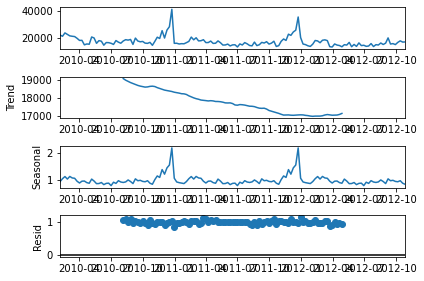

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(particular_data, model='multiplicative')
fig = result.plot()

In [130]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

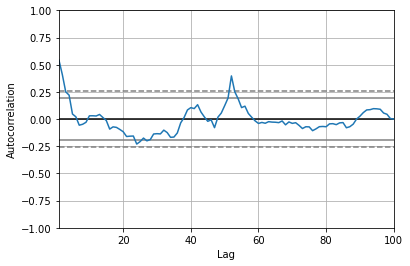

In [131]:
autocorrelation_plot(particular_data_train)

In [132]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(particular_data_train, order=(0,1,0))
model_fit = model.fit(disp=1)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:                   99
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -959.403
Method:                           css   S.D. of innovations           3912.767
Date:                Sat, 28 Aug 2021   AIC                           1922.806
Time:                        22:02:51   BIC                           1927.996
Sample:                    02-12-2010   HQIC                          1924.906
                         - 12-30-2011                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3093    393.248     -0.047      0.963    -789.061     752.442


/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, s

In [133]:
pip install --user pmdarima

You should consider upgrading via the '/Users/arissa/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [134]:
from pmdarima import auto_arima
auto_model = auto_arima(particular_data_train, start_p=1, d=0, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=False,
                           D=None, trace=True,
                           error_action='ignore'
                           )#suppress_warnings=True

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1926.145, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2255.538, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1944.558, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2192.542, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1927.869, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1928.393, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2083.681, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1928.596, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1917.784, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1931.343, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1918.348, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1918.023, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1919.181, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : 

In [135]:
auto_model.fit(particular_data_train)
print(auto_model)

 ARIMA(2,0,0)(0,0,0)[0] intercept


In [136]:
test_arima = auto_model.predict(n_periods= len(particular_data_test))


In [138]:
sales_data_train = combined_data_train[['Store', 'Dept', 'Date2', 'Weekly_Sales']]
sales_data_test = combined_data_test[['Store', 'Dept', 'Date2', 'Weekly_Sales']]

In [139]:
#checking the number of records for each store, dept combination
temper = sales_data_train.groupby(['Store', 'Dept'], as_index=False).agg({'Date2': 'count' })
temper = temper.rename(columns= {'Date2' : 'counter'})
temper.head()
temper2 = temper.groupby(['counter'], as_index=False).agg({'Store': 'count' })
temper2

counter  Store
0         1     40
1         2     40
2         3     21
3         4     29
4         5     14
..      ...    ...
93       96      6
94       97      9
95       98     23
96       99     31
97      100   2654

[98 rows x 2 columns]

In [140]:
temper.shape

(3292, 3)

In [141]:
from sklearn.metrics import mean_absolute_error

In [142]:
def arima_modeler(df_train, df_test):
    """
    Now we will create a function to create these models after hyper-parameter tuning for all the combinations of Store and Dept
    in the data    
    """
    combos_train = df_train.groupby(['Store', 'Dept'], as_index=False).agg({'Date2' : {'min', 'max', 'count'} })
    print(combos_train.shape)
    combos_test = df_test.groupby(['Store', 'Dept'], as_index=False).agg({'Date2' :  'count' })
    combos_test = combos_test[['Store', 'Dept']]
    print(combos_test.shape)
    combos_common = pd.merge(combos_train, combos_test, on = ['Store', 'Dept'])
    print(combos_common.shape)
    combos_common.columns = ["_".join(x) for x in combos_common.columns.ravel()]
    combos_common = combos_common.rename(columns = {'Store_' : 'Store', 'Dept_' : 'Dept'})
    combos_common['total_weeks'] = (combos_common['Date2_max'] - combos_common['Date2_min']).astype('timedelta64[D]')/7 + 1
    combos_common['date_gap'] = combos_common['total_weeks'] - combos_common['Date2_count']
    combos_common_nogap = combos_common.loc[combos_common['date_gap'] ==0 ]
    print(combos_common_nogap.shape)
    combos_common_nogap = combos_common_nogap.loc[combos_common_nogap['Date2_max'] == split_date ]
    combos_common_nogap = combos_common_nogap.loc[combos_common_nogap['Date2_count'] == 100 ]
    combos_common_nogap = combos_common_nogap.sort_values(by=['Store', 'Dept'])
    combos_common_nogap.reset_index(inplace=True)
    print(combos_common_nogap.shape)
    print(combos_common_nogap.head(10))
    
    sales_data_train_nogap = pd.merge(df_train, combos_common_nogap[['Store', 'Dept']], on =  ['Store', 'Dept'] )
    print(sales_data_train_nogap.shape)
    sales_data_test_nogap = pd.merge(df_test, combos_common_nogap[['Store', 'Dept']], on =  ['Store', 'Dept'] )
    print(sales_data_test_nogap.shape)#The remaining data cant be predicted

    sales_data_train_nogap = sales_data_train_nogap.sort_values(by=['Store', 'Dept', 'Date2'])
    sales_data_test_nogap = sales_data_test_nogap.sort_values(by=['Store', 'Dept', 'Date2'])
#     sales_data_test_nogap = sales_data_test_nogap[0:10000]
    
    #creating a DF that will store all the model outputs
    all_scores = pd.DataFrame(columns = ['score'])

    for i in range(len(combos_common_nogap)):#
        print(i)
        store_id = combos_common_nogap.loc[i]['Store']
        dept_id = combos_common_nogap.loc[i]['Dept']    
        print("Now the model for Store " + store_id + " and Dept " + dept_id + " will be created")
        particular_data_train = sales_data_train_nogap.loc[(sales_data_train_nogap['Store'] == store_id) & (sales_data_train_nogap['Dept'] == dept_id), \
                                              ['Date2', 'Weekly_Sales']   ]
        print(particular_data_train.shape)
        particular_data_test = sales_data_test_nogap.loc[(sales_data_test_nogap['Store'] == store_id) & (sales_data_test_nogap['Dept'] == dept_id), \
                                                  ['Date2', 'Weekly_Sales']   ]#, 'Weekly_Sales'
        print(particular_data_test.shape)
        #The date is required as index for ARIMA models
        particular_data_train.index = particular_data_train.Date2
        particular_data_test.index = particular_data_test.Date2

        particular_data_train = particular_data_train.drop('Date2', axis=1)
        particular_data_test = particular_data_test.drop('Date2', axis=1)
        
        #Hyper Parameter tuning
        auto_model = auto_arima(particular_data_train, start_p=1, d=0, start_q=1,max_p=3, max_q=3, start_P=0, trace=True)
        auto_model.fit(particular_data_train)
        print(auto_model)
        test_arima = auto_model.predict(n_periods=len(particular_data_test))
        test_arima_df  = pd.DataFrame(test_arima, columns = ['score'] )
        #appending the new scores along with the scores already obtained
        all_scores = pd.concat([all_scores, test_arima_df], axis=0)
        all_scores = all_scores.reset_index()
        all_scores = all_scores.drop(['index'], axis=1)
        print(mean_absolute_error(particular_data_test, test_arima))
    
    #getting the model scores and actuals in one file for comparison
    sales_data_test2 = sales_data_test_nogap.reset_index()
    sales_data_test2 = sales_data_test2.drop(['index'], axis=1)
    print(sales_data_test2.head())
    test_data_scored = pd.concat([sales_data_test2, all_scores], axis=1)
    return test_data_scored

In [143]:
partialtest_scored_arima = arima_modeler(sales_data_train, sales_data_test)

(3292, 5)
(3196, 2)
(3165, 5)
(2704, 7)
(2654, 8)
   index Store Dept  Date2_max  Date2_count  Date2_min  total_weeks  date_gap
0      0     1    1 2011-12-30          100 2010-02-05        100.0       0.0
1      1     1   10 2011-12-30          100 2010-02-05        100.0       0.0
2      2     1   11 2011-12-30          100 2010-02-05        100.0       0.0
3      3     1   12 2011-12-30          100 2010-02-05        100.0       0.0
4      4     1   13 2011-12-30          100 2010-02-05        100.0       0.0
5      5     1   14 2011-12-30          100 2010-02-05        100.0       0.0
6      6     1   16 2011-12-30          100 2010-02-05        100.0       0.0
7      7     1   17 2011-12-30          100 2010-02-05        100.0       0.0
8      9     1   19 2011-12-30          100 2010-02-05        100.0       0.0
9     10     1    2 2011-12-30          100 2010-02-05        100.0       0.0
(265400, 4)
(114020, 4)


/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


0
Now the model for Store 1 and Dept 1 will be created
(100, 2)
(43, 2)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2086.124, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2132.819, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2093.937, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2087.398, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2312.076, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2088.278, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2086.511, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2084.936, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2086.462, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2089.764, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2170.255, Time=0.07 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.326 seconds
 ARIMA(0,0,2)(0,0,0)[0] intercept
5475.190273909715
1
Now the model for Store 1 an

In [144]:
partialtest_scored_arima.shape

(114020, 5)

In [145]:
sales_data_test_arima = pd.merge(sales_data_test, partialtest_scored_arima.drop(['Weekly_Sales'], axis=1), on=['Store', 'Dept', 'Date2'], how='left' )
sales_data_test_arima.isna().sum()

Store               0
Dept                0
Date2               0
Weekly_Sales        0
score           12988
dtype: int64